This code snippet starts off by importing an extensive number of libraries and modules needed for the data processing and visualization workflow, machine learning workflow: numerical computation, pandas for numerical computation, and matplotlib and seaborn for data visualisation, while tensorflow and keras are for deep learning frameworks and scikit-learn. The code below will import modules for deep learning model building, optimization, evaluation metrics, dimensionality reduction, and classification algorithms. Additional utilities include statsmodels for statistical analysis, tqdm for progress tracking, and mlxtend for visualization. Warnings are suppressed to clean the output, and inline plotting is enabled for seamless visualization in notebooks.

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,LSTM, Bidirectional,GRU
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

This code snippet names the columns for a dataset without headers and provides a detailed list of feature and target variable names relevant for network intrusion detection. It then imports training and testing datasets from respective files called `KDDTrain+.txt` and `KDDTest+.txt` using pandas, maintaining consistency in column naming. This sets up further data analysis and modeling.

In [ ]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
# importing dataset
data = pd.read_csv('KDDTrain+.txt',header=None, names=col_names)
dataTest = pd.read_csv('KDDTest+.txt',header=None, names=col_names)

The code shows the contents of the imported datasets, 'data' for the training dataset and 'dataTest' for the testing dataset. The datasets consist of features in network intrusion detection, including connection attributes, counts, rates, and labels indicating normal or malicious activity. These printed datasets provide a view for inspection or verification purposes before the actual preprocessing and analysis.

In [ ]:
# print dataset
data

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           tcp  ftp_data   SF        491          0     0   
1              0           udp     other   SF        146          0     0   
2              0           tcp   private   S0          0          0     0   
3              0           tcp      http   SF        232       8153     0   
4              0           tcp      http   SF        199        420     0   
...          ...           ...       ...  ...        ...        ...   ...   
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                    0       0    0  ...                    0.17   
1                    0       0    0  ...                    0.00   
2                    0       0    0  ...                    0.10   
3                    0       0    0  ...                    1.00   
4                    0       0    0  ...                    1.00   
...                ...     ...  ...  ...                     ...   
125968               0       0    0  ...                    0.10   
125969               0       0    0  ...                    0.96   
125970               0       0    0  ...                    0.12   
125971               0       0    0  ...                    0.03   
125972               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                         0.03                         0.17   
1                         0.60                         0.88   
2                         0.05                         0.00   
3                         0.00                         0.03   
4                         0.00                         0.00   
...                        ...                          ...   
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                              0.00                  0.00   
1                              0.00                  0.00   
2                              0.00                  1.00   
3                              0.04                  0.03   
4                              0.00                  0.00   
...                             ...                   ...   
125968                         0.00                  1.00   
125969                         0.00                  0.00   
125970                         0.00                  0.72   
125971                         0.00                  1.00   
125972                         0.00                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.00                  0.05   
1                           0.00                  0.00   
2                           1.00                  0.00   
3                           0.01                  0.00   
4                           0.00                  0.00   
...                          ...                   ...   
125968                      1.00                  0.00   
125969                      0.00                  0.00   
125970                      0.00                  0.01   
125971                      1.00                  0.00   
125972                      0.00                  0.00   

        dst_host_srv_rerror_rate    label  difficulty_level  
0                

In [ ]:
dataTest

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                   0       0    0  ...                    0.04   
1                   0       0    0  ...                    0.00   
2                   0       0    0  ...                    0.61   
3                   0       0    0  ...                    1.00   
4                   0       0    0  ...                    0.31   
...               ...     ...  ...  ...                     ...   
22539               0       0    0  ...                    0.72   
22540               0       0    0  ...                    1.00   
22541               0       0    2  ...                    1.00   
22542               0       0    0  ...                    0.99   
22543               0       0    0  ...                    0.08   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                        0.06                         0.00   
1                        0.06                         0.00   
2                        0.04                         0.61   
3                        0.00                         1.00   
4                        0.17                         0.03   
...                       ...                          ...   
22539                    0.06                         0.01   
22540                    0.00                         0.01   
22541                    0.00                         0.00   
22542                    0.01                         0.00   
22543                    0.03                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                             0.00                  0.00   
1                             0.00                  0.00   
2                             0.02                  0.00   
3                             0.28                  0.00   
4                             0.02                  0.00   
...                            ...                   ...   
22539                         0.01                  0.01   
22540                         0.01                  0.01   
22541                         0.00                  0.00   
22542                         0.00                  0.00   
22543                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                           0.0                  1.00   
1                           0.0                  1.00   
2                           0.0                  0.00   
3                           0.0                  0.00   
4                           0.0                  0.83   
...                         ...                   ...   
22539                       0.0                  0.00   
22540                       0.0                  0.00   
22541                       0.0                  0.07   
22542                       0.0                  0.00   
22543                       0.0                  0.44   

       dst_host_srv_rerror_rate    label  difficulty_level  
0                          1.00  neptune                21  
1   

Here is the code that removes the attribute "difficulty_level" in both training and testing data through a function with a parameter axis=1 that was used for column removal: Now, let's visualize how the shapes of the updated dataset have changed by excluding that particular attribute.

In [ ]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [ ]:
dataTest.drop(['difficulty_level'],axis=1,inplace=True)
dataTest.shape

(22544, 42)

This code provides descriptive statistics and unique value counts for both the training, data, and testing, dataTest, datasets. The describe() method produces summary statistics that describes the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values. The `nunique()` method returns counts of unique values for each column. It helps detect the variability of features and might indicate that a certain column contains categorical data. Such analysis considerably helps in extracting information from any dataset regarding their structures and provides a good start toward the cleaning or modeling process.

In [ ]:
# descriptive statistics of dataset
data.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125973.000000    125973.000000  ...   125973.000000   
mean        0.395736         0.279250  ...      182.148945   
std         0.489010        23.942042  ...       99.206213   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125973.000000           125973.000000           125973.000000   
mean           115.653005                0.521242                0.082951   
std            110.702741                0.448949                0.188922   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125973.000000  
mean                   0.120240  
std                    0.319459  
min                    0.000000  
25%       

In [ ]:
# descriptive statistics of dataset
dataTest.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.496659   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_count  dst_host_srv_count  \
count     22544.000000  ...    22544.000000        22544.000000   
mean          0.119899  ...      193.869411          140.750532   
std           7.269597  ...       94.035663          111.783972   
min           0.000000  ...        0.000000            0.000000   
25%           0.000000  ...      121.000000           15.000000   
50%           0.000000  ...      255.000000          168.000000   
75%           0.000000  ...      255.000000          255.000000   
max         796.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            22544.000000            22544.000000   
mean                 0.608722                0.090540   
std                  0.435688                0.220717   
min                  0.000000                0.000000   
25%                  0.070000                0.000000   
50%                  0.920000                0.010000   
75%                  1.000000                0.060000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 22544.000000                 22544.000000   
mean                      0.132261                     0.019638   
std                       0.306268                     0.085394   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.030000                     0.010000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          22544.000000              22544.000000          22544.000000   
mean               0.097814                  0.099426              0.233385   
std                0.273139                  0.281866              0.387229   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.360000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              22544.000000  
mean                   0.226683  
std                    0.400875  
min                    0.000000  
25%                    0.000000  
50%         

In [ ]:
data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                   101
diff_srv_rate                    95
srv_diff_host_rate               60
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      75
dst_host_serror_rate            101
dst_host_srv_serror_rate        100
dst_host_rerror_rate            101
dst_host_srv_rerror_rate        101
label                            23
dtype: int64

In [ ]:
dataTest.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate                    75
diff_srv_rate                    99
srv_diff_host_rate               84
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      58
dst_host_serror_rate             99
dst_host_srv_serror_rate        101
dst_host_rerror_rate            101
dst_host_srv_rerror_rate        100
label                            38
dtype: int64

This code visualizes the distribution of attack types in the NSL-KDD dataset using a count plot from the seaborn library. It first creates a larger and clearer figure by setting the plot size to 16x8 inches. The `countplot` function is used to display the count of each attack type in the `label` column of the dataset. The plot is customized by adding a title, axis labels, and rotating the x-axis tick labels for better readability. The plot is saved in a `.jpg` format and then displayed using `plt.show()`. This provides a visual overview of the class distribution of attack types in the dataset.

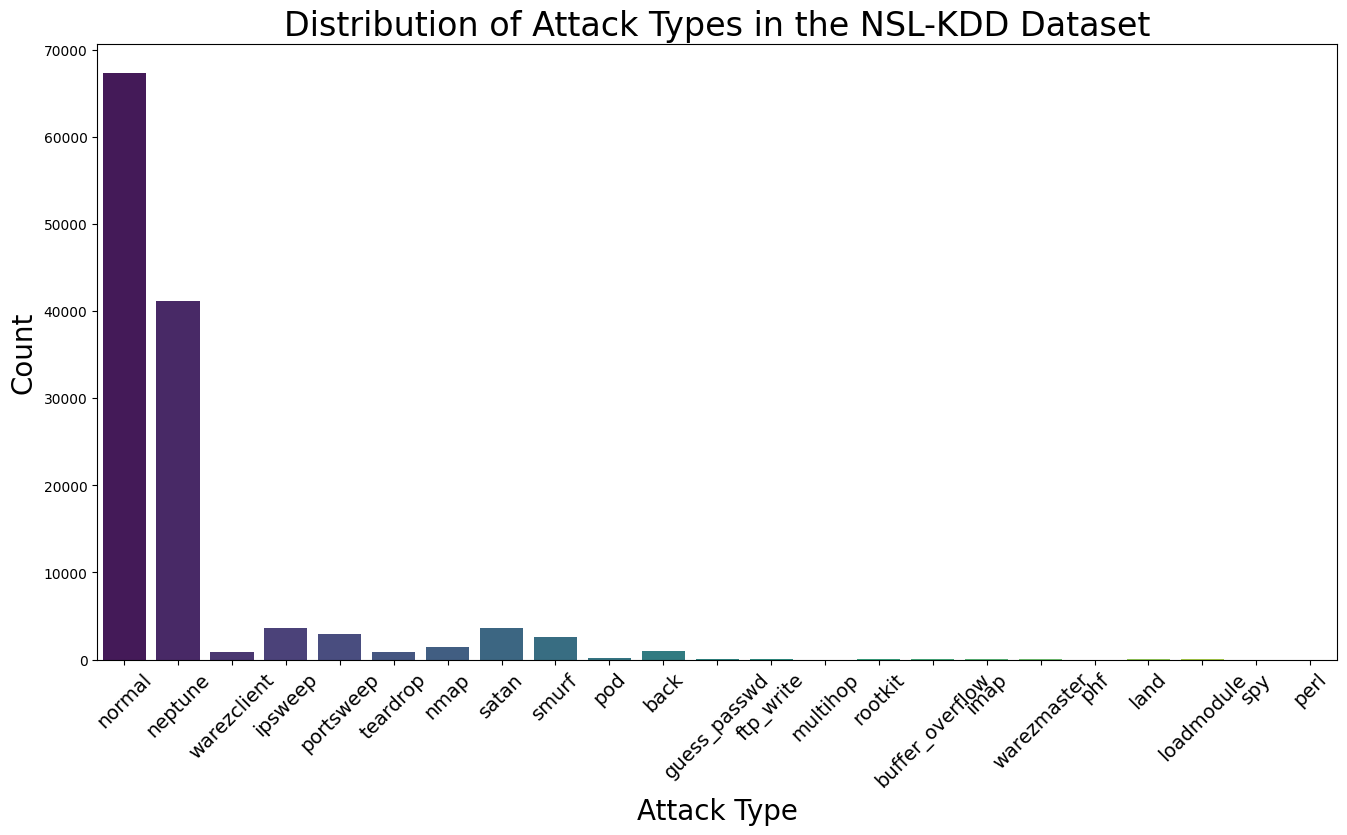

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Trained_Data' contains your loaded NSL-KDD dataset
# If the 'attack' column is categorical, you may want to encode it, but for now, we assume it's already in usable form.

# Create a larger and clearer figure
plt.figure(figsize=(16, 8))

# Distribution of the 'attack' variable in the NSL-KDD dataset
sns.countplot(x='label', data=data, palette='viridis')

# Set title and labels
plt.title('Distribution of Attack Types in the NSL-KDD Dataset', fontsize=24)
plt.xlabel('Attack Type', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Increase the font size of x-axis tick labels
plt.xticks(rotation=45, fontsize=14)  # Rotating to prevent label overlap if there are many classes

# Save the plot as an image
plt.savefig('Distribution_attack_types_NSL-KDD.jpg')

# Show the plot
plt.show()

This code will fetch and display the count of each unique value in the `label` column of the `data` dataset, which represents the attack labels. The `value_counts()` method returns the frequency of each type of attack, hence giving a better understanding of the distribution of different attack categories in the dataset. This step is useful for identifying class imbalances or the prevalence of certain attack types.

In [ ]:
# number of attack labels
data['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

This code defines a function unique_values(df, columns) that prints the unique values and their counts for the specified columns in a given DataFrame. It iterates over each column in the list columns, extracting the unique values along with their respective counts by using unique() and value_counts(). The function then prints these results in a readable format. Then, the code picks all the categorical features, that is columns of object data types, from the dataset 'data', and runs the function unique_values() on those to show the unique values along with the count of these categorical columns. This helps to understand the distribution of categorical data in the dataset.

In [ ]:
def unique_values(df, columns):
    '''
    Prints the unique values and their counts for the specified columns
    in the given DataFrame.
    '''
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        # Extract unique values and their counts
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        # Print the unique values and their counts
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

# Select categorical features (object type) in the NSL-KDD dataset
cat_features = data.select_dtypes(include='object').columns

# Call the function to print unique values and counts for categorical features
unique_values(data, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'udp' 'icmp']

Value Counts:
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
 

Classifying The Attck Results

The code here will create a new binary column, attack_state, for both the training and testing data to represent whether an attack is present or not. This code maps 0 if the attack label is 'normal' and 1 if it represents any other type of attack using the map() function. The binary result will be stored in the new column called attack_state. Finally, the function `head(10)` is used to display the first 10 rows of both `data` and `dataTest`, giving a sneak peek into the newly added column and how the structure of the data has changed.

In [ ]:
Trained_attack = data.label.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = dataTest.label.map(lambda a: 0 if a == 'normal' else 1)

data['attack_state'] = Trained_attack
dataTest['attack_state'] = Tested_attack

In [ ]:
data.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   
5               0       0    0  ...                    0.07   
6               0       0    0  ...                    0.04   
7               0       0    0  ...                    0.06   
8               0       0    0  ...                    0.09   
9               0       0    0  ...                    0.05   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   
5                    0.07                         0.00   
6                    0.05                         0.00   
7                    0.07                         0.00   
8                    0.05                         0.00   
9                    0.06                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   
5                         0.00                  0.00   
6                         0.00                  1.00   
7                         0.00                  1.00   
8                         0.00                  1.00   
9                         0.00                  1.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   
5                      0.00                  1.00                      1.00   
6                      1.00                  0.00                      0.00   
7                      1.00                  0.00                      0.00   
8                      1.00                  0.00                      0.00   
9                      1.00                  0.00                      0.00   

     label  attack_state  
0   normal             0  
1   normal             0  
2  neptune             1  
3   normal             0  
4   normal             0  
5  neptune             1  
6  neptune             1  
7  neptune             1  
8  neptune             1  
9  neptune             1  

[10 rows x 43 columns]

In [ ]:
dataTest.head(10)

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   
5         0           tcp      http    SF        267      14515     0   
6         0           tcp      smtp    SF       1022        387     0   
7         0           tcp    telnet    SF        129        174     0   
8         0           tcp      http    SF        327        467     0   
9         0           tcp       ftp    SF         26        157     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   
5               0       0    0  ...                    1.00   
6               0       0    0  ...                    0.11   
7               0       0    0  ...                    1.00   
8               0       0    0  ...                    1.00   
9               0       0    0  ...                    0.50   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   
5                    0.00                         0.01   
6                    0.72                         0.00   
7                    0.00                         0.00   
8                    0.00                         0.01   
9                    0.08                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.02                  0.00   
3                         0.28                  0.00   
4                         0.02                  0.00   
5                         0.03                  0.01   
6                         0.00                  0.00   
7                         0.00                  0.01   
8                         0.03                  0.00   
9                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  1.00                      1.00   
1                      0.00                  1.00                      1.00   
2                      0.00                  0.00                      0.00   
3                      0.00                  0.00                      0.00   
4                      0.00                  0.83                      0.71   
5                      0.00                  0.00                      0.00   
6                      0.00                  0.72                      0.04   
7                      0.01                  0.02                      0.02   
8                      0.00                  0.00                      0.00   
9                      0.00                  0.00                      0.00   

          label  attack_state  
0       neptune             1  
1       neptune             1  
2        normal             0  
3         saint             1  
4         mscan             1  
5        normal             0  
6        normal             0  
7  guess_passwd             1  
8        normal             0  
9  guess_passwd             1  

[10 rows x 43 columns]

Data preprocessing
Checking for missing data

In [ ]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
label                          0
attack_state                   0
dtype: int64

In [ ]:
dataTest.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
label                          0
attack_state                   0
dtype: int64

Checking for Dulplicates

This code checks for duplicate rows in both the training and testing data using the duplicated() method. The sum() function is applied to count how many duplicate rows there are. This will give the number of rows in each dataset that exactly match other rows and would be useful in finding out the redundancy that exists within either dataset before further analysis or modeling.

In [ ]:
data.duplicated().sum()

0

In [ ]:
dataTest.duplicated().sum()

0

Handling Outliers
Outliers may cause noise when training the dataset

This code will first print the shape of the `data` and `dataTest` datasets, which gives the number of rows and columns in each dataset. Then, it generates box plots for the two datasets using the `plot(kind='box')` method. The box plots are generated as subplots with 8 rows and 5 columns, and the figure size is set to 20x40 inches to ensure clarity. These plots give a view of the distribution, outliers, and range of values for each feature in the datasets, which is useful for identifying potential anomalies or extreme values that may require further preprocessing.

In [ ]:
data.shape

(125973, 43)

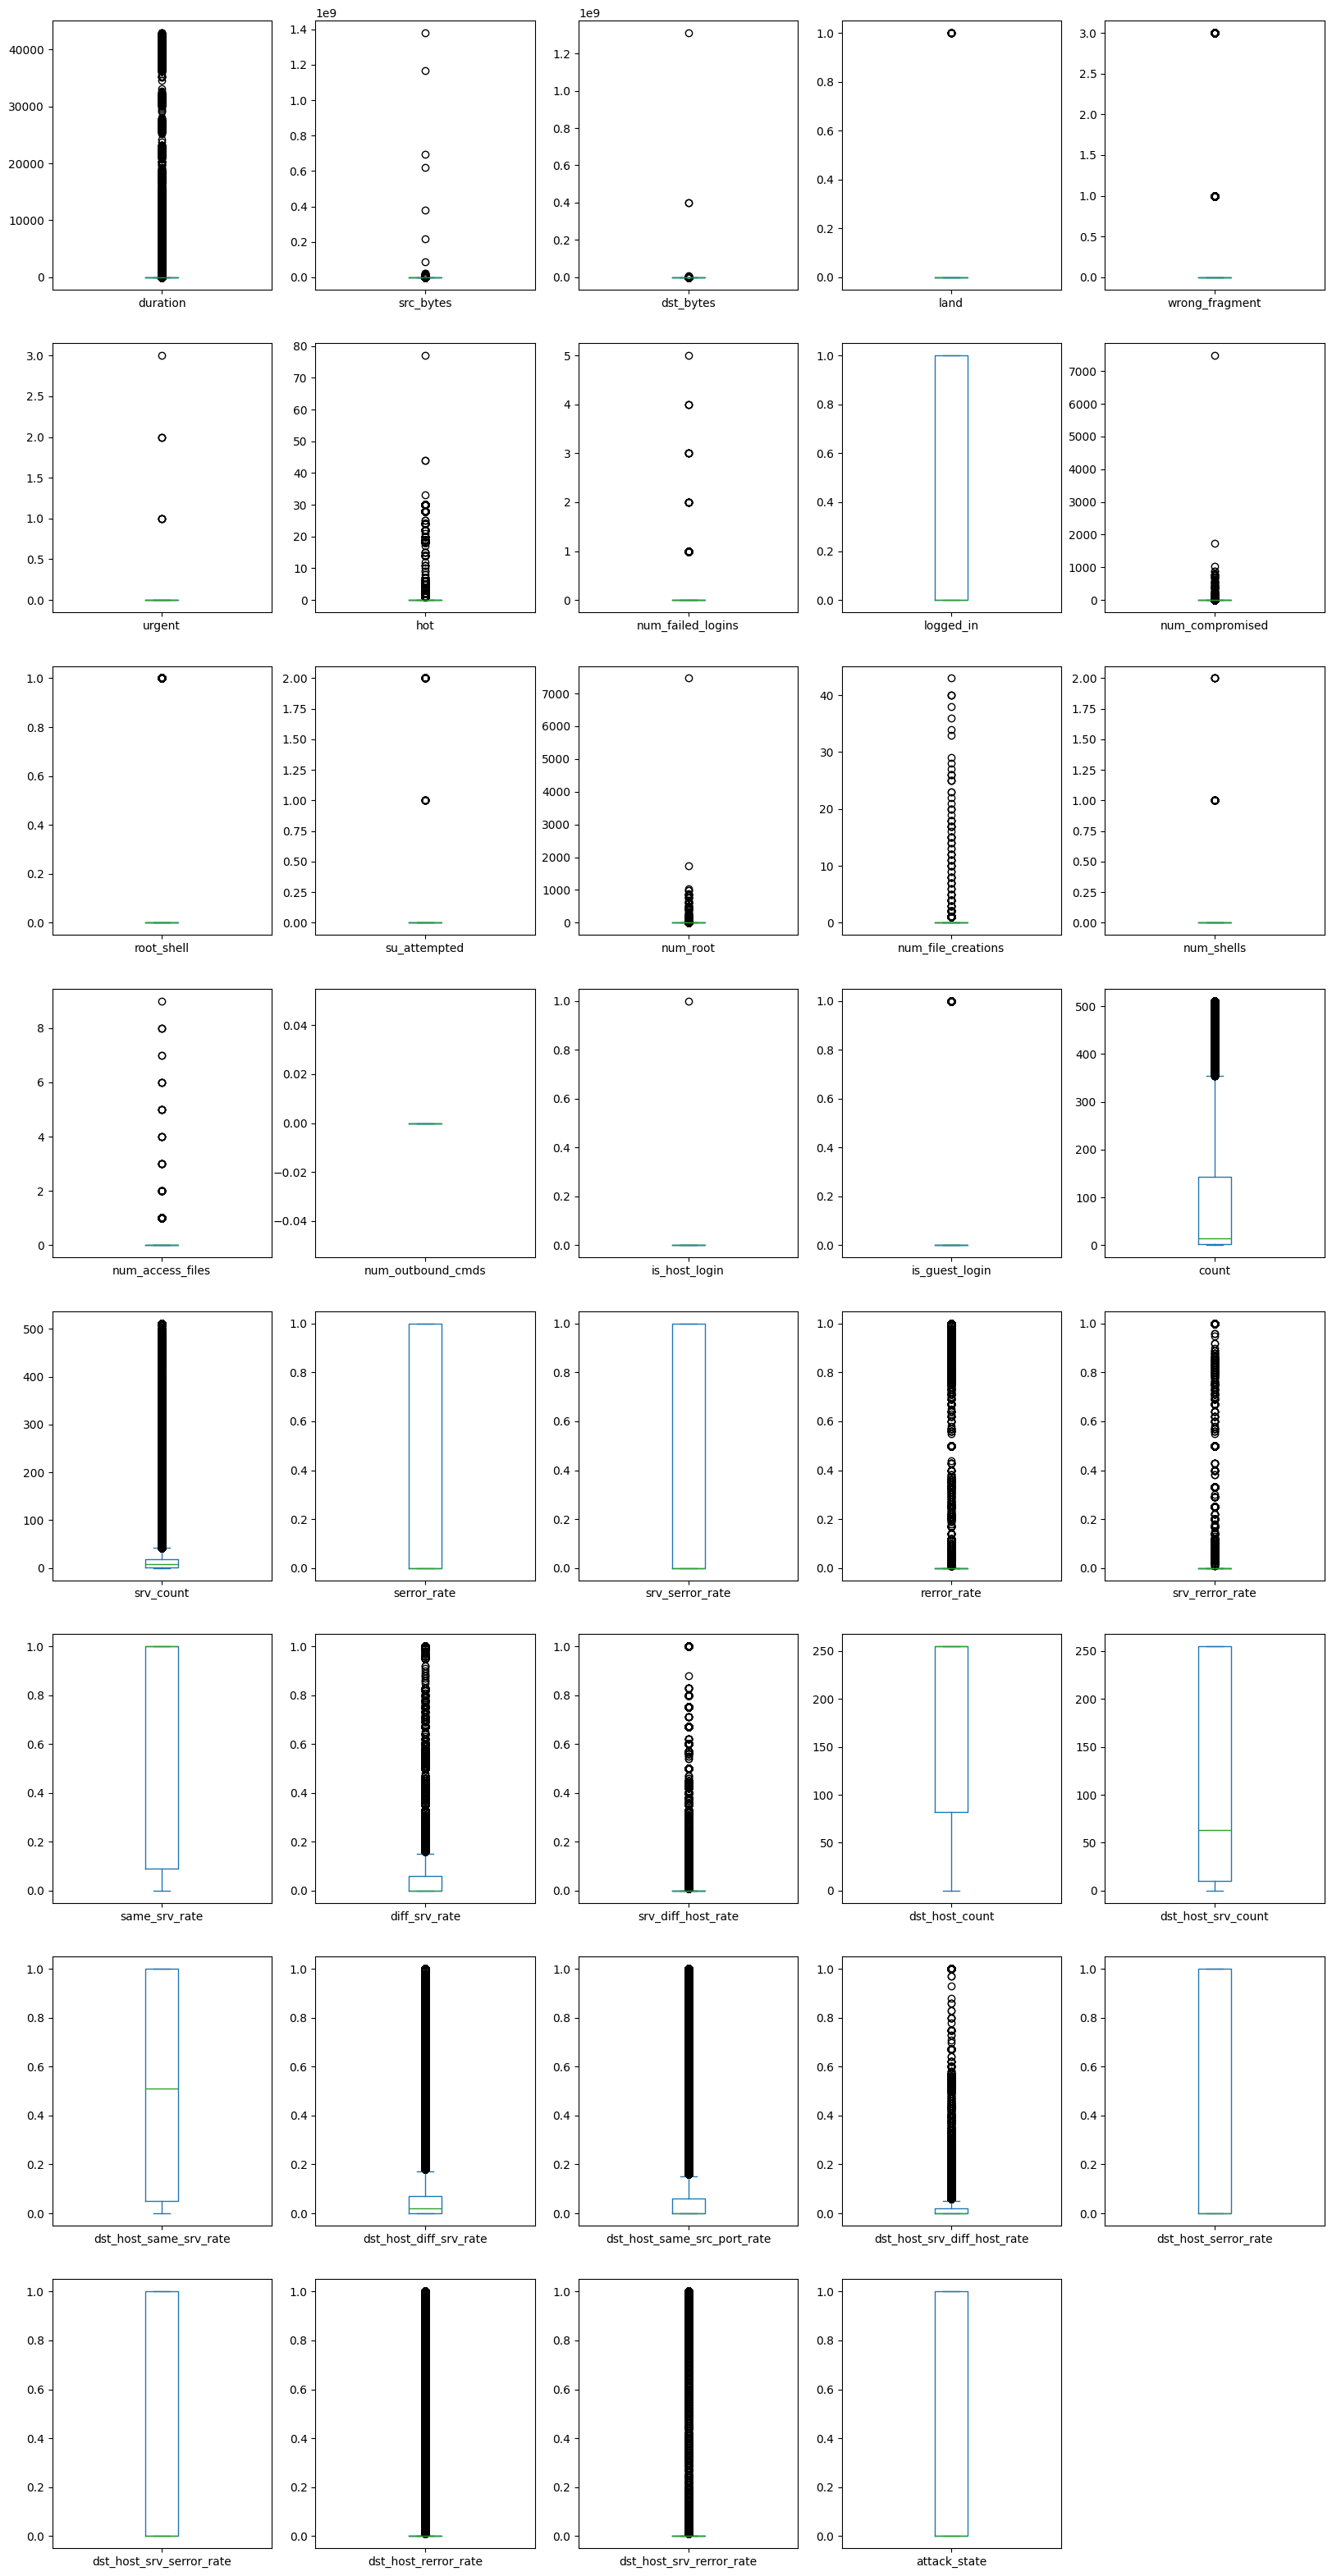

In [ ]:
data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40))
plt.show()

In [ ]:
dataTest.shape

(22544, 43)

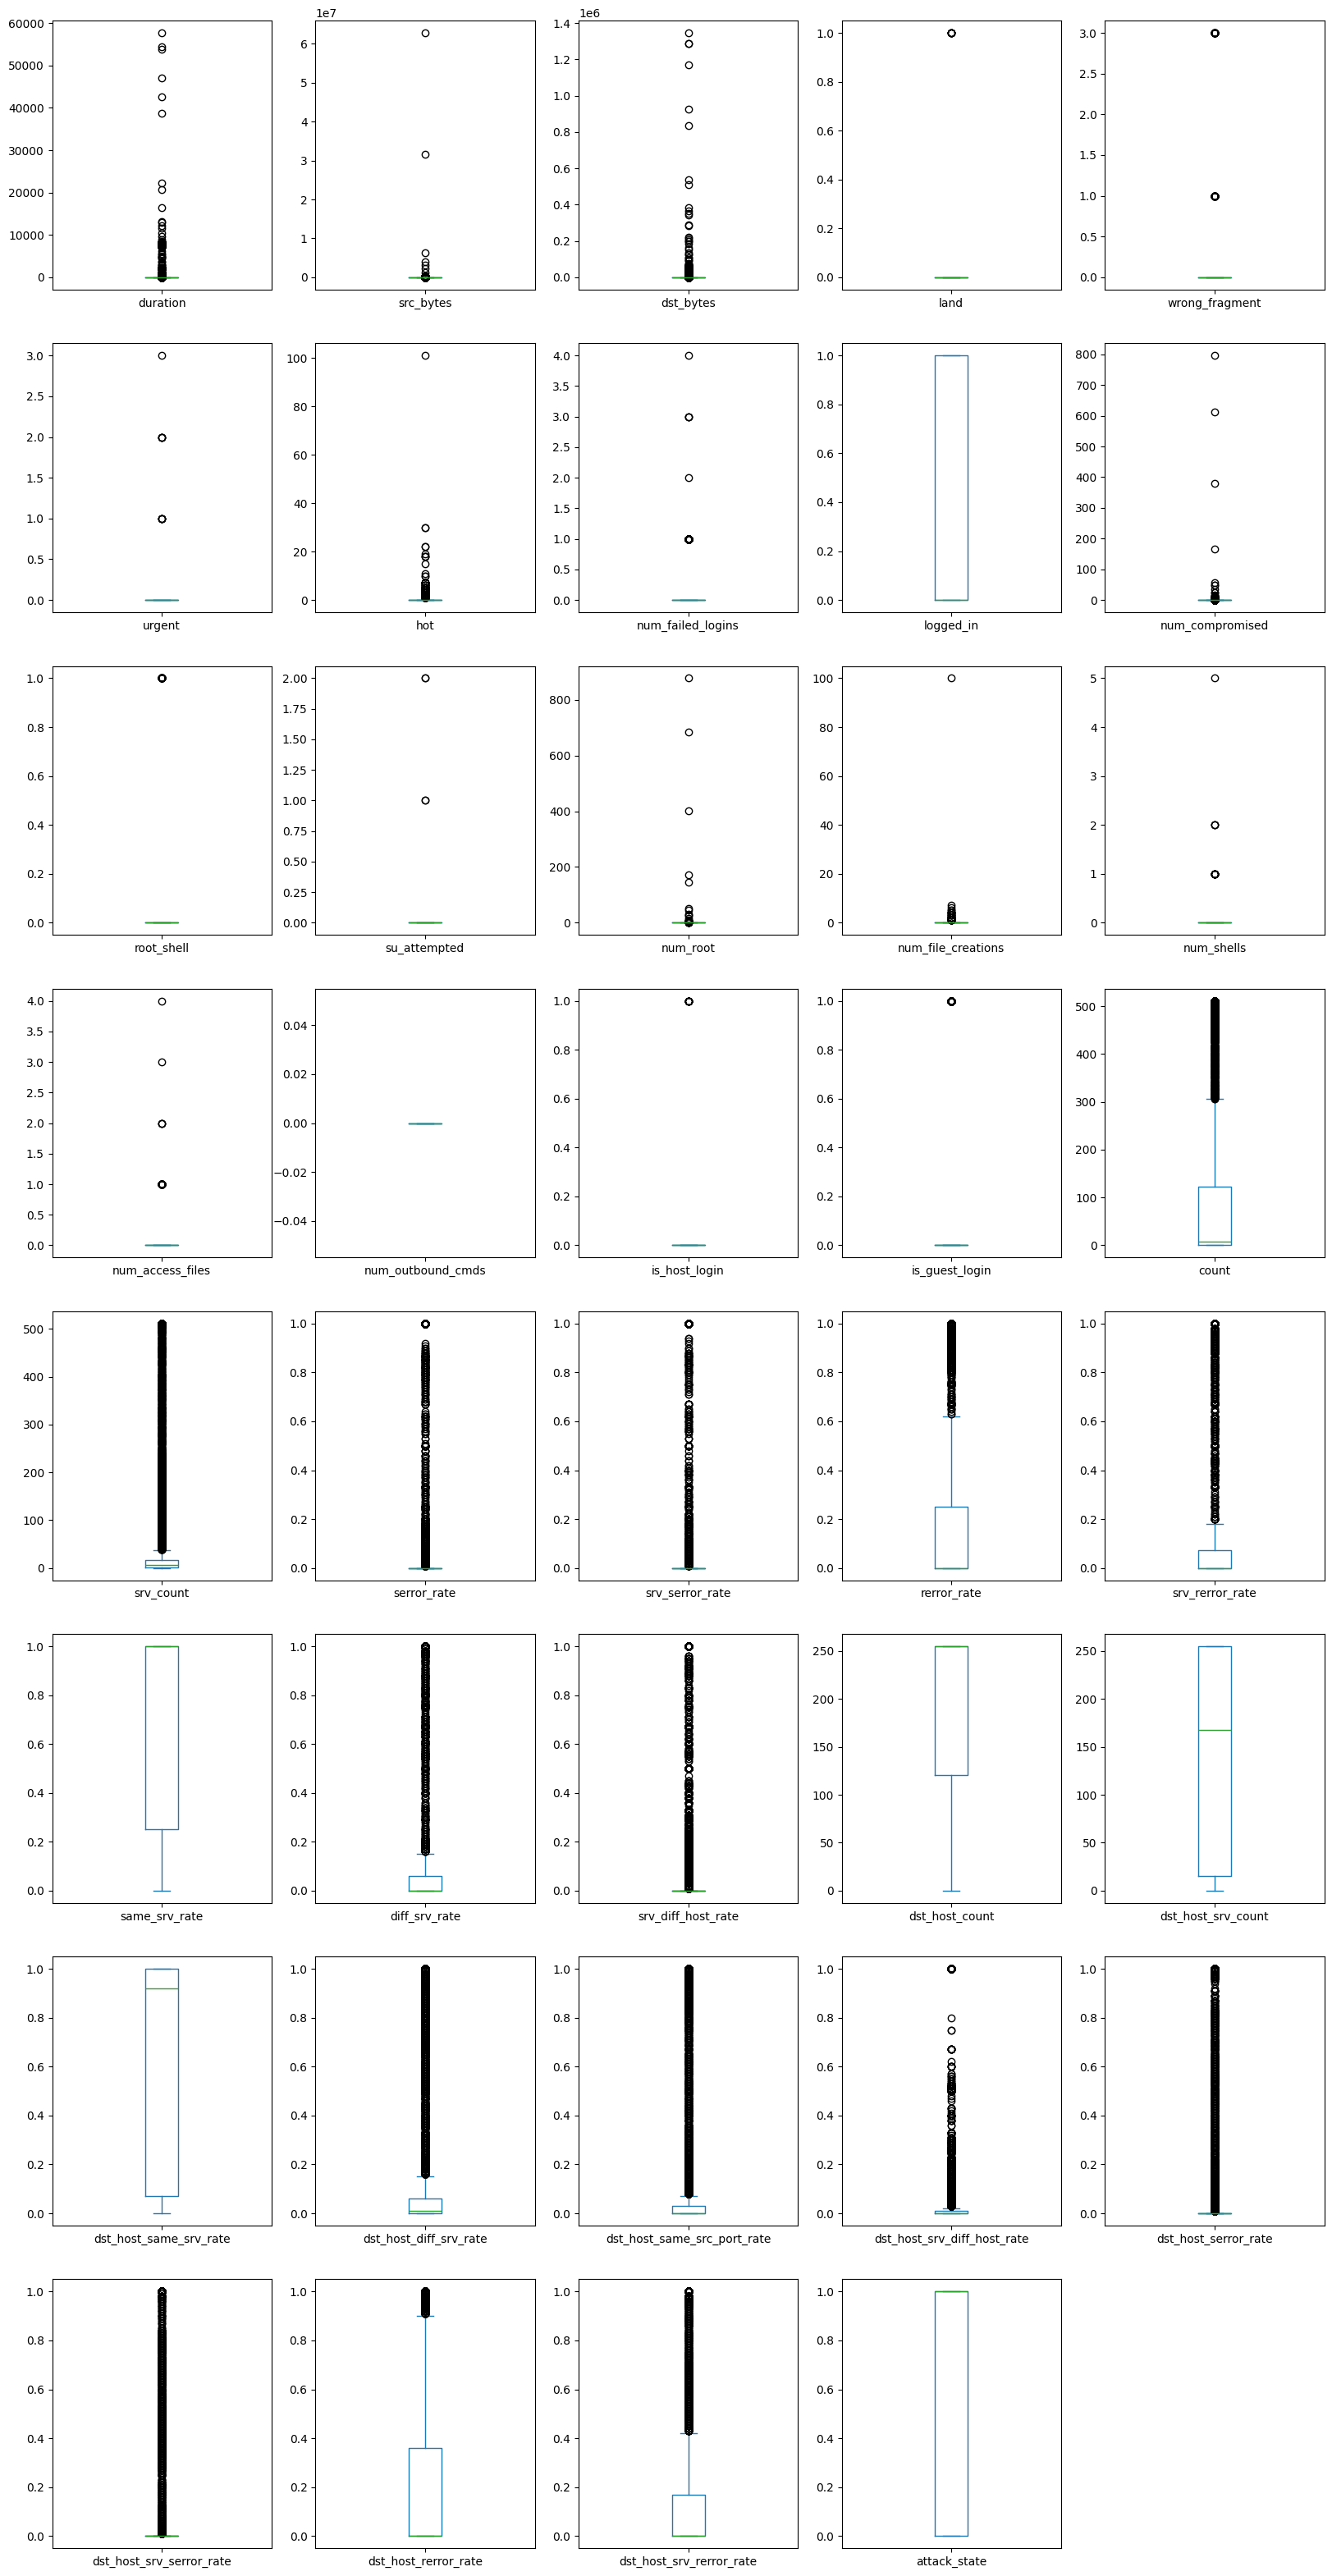

In [ ]:
dataTest.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40))
plt.show()

This code defines a function change_label(df) that groups certain attack types into broader categories for easier classification. It replaces some attack labels for new class labels: 'Dos' for Denial of Service attacks, 'R2L' for Remote to Local attacks, 'Probe' for scanning or probing attacks, and 'U2R' for User to Root attacks. It then calls this function on the `data` dataset and displays the distribution of the updated attack classes using `value_counts()`, showing the frequency of each class in the `label` column. This helps in assessing the balance of attack categories after grouping the attack types.

In [ ]:
# changing attack labels to their respective attack class
def change_label(df):
    df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
    df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
# calling change_label() function
change_label(data)

In [ ]:
# distribution of attack classes
data.label.value_counts()

label
normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

Data Normalization

This code normalizes the numerical columns in the `data` dataset using the `StandardScaler` from scikit-learn. It first selects the numeric columns from the dataset and then defines a function `normalization(df, col)` that applies `StandardScaler` to each of these columns. The `StandardScaler` scales all columns to the standard, changing the values to have an average of 0 and a variance of 1. The `head()` function is used before and after normalization to show the dataset for comparison. It helps in putting all the numerical features on the same scale, which becomes imperative for various machine learning models to work aptly.

In [ ]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

In [ ]:
# data before normalization
data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

    label  attack_state  
0  normal             0  
1  normal             0  
2     Dos             1  
3  normal             0  
4  normal             0  

[5 rows x 43 columns]

In [ ]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [ ]:
# data after normalization
data.head()

duration protocol_type   service flag  src_bytes  dst_bytes      land  \
0 -0.110249           tcp  ftp_data   SF  -0.007679  -0.004919 -0.014089   
1 -0.110249           udp     other   SF  -0.007737  -0.004919 -0.014089   
2 -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
3 -0.110249           tcp      http   SF  -0.007723  -0.002891 -0.014089   
4 -0.110249           tcp      http   SF  -0.007728  -0.004814 -0.014089   

   wrong_fragment    urgent       hot  ...  dst_host_same_srv_rate  \
0       -0.089486 -0.007736 -0.095076  ...               -0.782367   
1       -0.089486 -0.007736 -0.095076  ...               -1.161030   
2       -0.089486 -0.007736 -0.095076  ...               -0.938287   
3       -0.089486 -0.007736 -0.095076  ...                1.066401   
4       -0.089486 -0.007736 -0.095076  ...                1.066401   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0               -0.280282                     0.069972   
1                2.736852                     2.367737   
2               -0.174417                    -0.480197   
3               -0.439078                    -0.383108   
4               -0.439078                    -0.480197   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                    -0.289103             -0.639532   
1                    -0.289103             -0.639532   
2                    -0.289103              1.608759   
3                     0.066252             -0.572083   
4                    -0.289103             -0.639532   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                 -0.624871             -0.224532                 -0.376387   
1                 -0.624871             -0.387635                 -0.376387   
2                  1.618955             -0.387635                 -0.376387   
3                 -0.602433             -0.387635                 -0.345084   
4                 -0.624871             -0.387635                 -0.376387   

    label  attack_state  
0  normal     -0.933069  
1  normal     -0.933069  
2     Dos      1.071732  
3  normal     -0.933069  
4  normal     -0.933069  

[5 rows x 43 columns]

One-hot-encoding

Here goes the code that does the pre-processing on categorical columns in both training, data, and test, dataTest, datasets. It first selects columns like protocol_type, service, and flag as categorical features. Then, two different dataframes, namely categorical and categoricalTest, are created for holding the categorical attributes for the training dataset and the test dataset separately. The `pandas.get_dummies()` function is then used on the categorical columns to create one-hot encoding, turning those columns into binary ones where every unique category becomes a different column with values of either 0 or 1. This is then applied to both the training and testing dataframes. This displays the encoded dataframes - `categorical` and `categoricalTest` - to check the encoding process. This step is highly important in the conversion of categorical variables into a format that can be used by machine learning models.

In [ ]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [ ]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF

In [ ]:
# creating a dataframe with only categorical attributes
categoricalTest = dataTest[cat_col]
categoricalTest.head()

protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO

In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0               False               True              False        False   
1               False              False               True        False   
2               False               True              False        False   
3               False               True              False        False   
4               False               True              False        False   

   service_X11  service_Z39_50  service_aol  service_auth  service_bgp  \
0        False           False        False         False        False   
1        False           False        False         False        False   
2        False           False        False         False        False   
3        False           False        False         False        False   
4        False           False        False         False        False   

   service_courier  ...  flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0  \
0            False  ...     False      False        False      False    False   
1            False  ...     False      False        False      False    False   
2            False  ...     False      False        False      False     True   
3            False  ...     False      False        False      False    False   
4            False  ...     False      False        False      False    False   

   flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  
0    False    False    False     True    False  
1    False    False    False     True    False  
2    False    False    False    False    False  
3    False    False    False     True    False  
4    False    False    False     True    False  

[5 rows x 84 columns]

In [ ]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categoricalTest = pd.get_dummies(categoricalTest,columns=cat_col)
categoricalTest.head()

protocol_type_icmp  protocol_type_tcp  protocol_type_udp  service_IRC  \
0               False               True              False        False   
1               False               True              False        False   
2               False               True              False        False   
3                True              False              False        False   
4               False               True              False        False   

   service_X11  service_Z39_50  service_auth  service_bgp  service_courier  \
0        False           False         False        False            False   
1        False           False         False        False            False   
2        False           False         False        False            False   
3        False           False         False        False            False   
4        False           False         False        False            False   

   service_csnet_ns  ...  flag_REJ  flag_RSTO  flag_RSTOS0  flag_RSTR  \
0             False  ...      True      False        False      False   
1             False  ...      True      False        False      False   
2             False  ...     False      False        False      False   
3             False  ...     False      False        False      False   
4             False  ...     False       True        False      False   

   flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  
0    False    False    False    False    False    False  
1    False    False    False    False    False    False  
2    False    False    False    False     True    False  
3    False    False    False    False     True    False  
4    False    False    False    False    False    False  

[5 rows x 78 columns]

Binary Classification

This code processes the labels of the attack in the data dataset, converting them into binary format: 'normal' and 'abnormal'. It uses the map() function to label everything that is not 'normal' as 'abnormal', storing the result in the bin_label dataframe. Then, with a copy of the original dataset, bin_data, the new column bin_label will be added. Now, `LabelEncoder` from `sklearn.preprocessing` has been used to convert 'normal' and 'abnormal' labels to binary, with 0 corresponding to 'normal' and 1 for 'abnormal'. Then this encoded label has been added as a new column `intrusion` in the `bin_data` dataframe. Here, `classes_` attribute has been printed from the instantiated `LabelEncoder` object to cross check the mapping of labels to numeric values. Finally, the binary labels are one-hot encoded using `pd.get_dummies()`, and the column `label` is reset with the original `bin_label` values. This results in a dataframe where the attack label is represented both as a binary numeric label and a one-hot encoded version.

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [ ]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [ ]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [ ]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
# dataset with binary labels and label encoded column
bin_data.head()

duration protocol_type   service flag  src_bytes  dst_bytes      land  \
0 -0.110249           tcp  ftp_data   SF  -0.007679  -0.004919 -0.014089   
1 -0.110249           udp     other   SF  -0.007737  -0.004919 -0.014089   
2 -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
3 -0.110249           tcp      http   SF  -0.007723  -0.002891 -0.014089   
4 -0.110249           tcp      http   SF  -0.007728  -0.004814 -0.014089   

   wrong_fragment    urgent       hot  ...  dst_host_diff_srv_rate  \
0       -0.089486 -0.007736 -0.095076  ...               -0.280282   
1       -0.089486 -0.007736 -0.095076  ...                2.736852   
2       -0.089486 -0.007736 -0.095076  ...               -0.174417   
3       -0.089486 -0.007736 -0.095076  ...               -0.439078   
4       -0.089486 -0.007736 -0.095076  ...               -0.439078   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                     0.069972                    -0.289103   
1                     2.367737                    -0.289103   
2                    -0.480197                    -0.289103   
3                    -0.383108                     0.066252   
4                    -0.480197                    -0.289103   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0             -0.639532                 -0.624871             -0.224532   
1             -0.639532                 -0.624871             -0.387635   
2              1.608759                  1.618955             -0.387635   
3             -0.572083                 -0.602433             -0.387635   
4             -0.639532                 -0.624871             -0.387635   

   dst_host_srv_rerror_rate     label  attack_state  intrusion  
0                 -0.376387    normal     -0.933069          1  
1                 -0.376387    normal     -0.933069          1  
2                 -0.376387  abnormal      1.071732          0  
3                 -0.345084    normal     -0.933069          1  
4                 -0.376387    normal     -0.933069          1  

[5 rows x 44 columns]

In [ ]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="")
bin_data['label'] = bin_label
bin_data

duration protocol_type   service flag  src_bytes  dst_bytes      land  \
0      -0.110249           tcp  ftp_data   SF  -0.007679  -0.004919 -0.014089   
1      -0.110249           udp     other   SF  -0.007737  -0.004919 -0.014089   
2      -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
3      -0.110249           tcp      http   SF  -0.007723  -0.002891 -0.014089   
4      -0.110249           tcp      http   SF  -0.007728  -0.004814 -0.014089   
...          ...           ...       ...  ...        ...        ...       ...   
125968 -0.110249           tcp   private   S0  -0.007762  -0.004919 -0.014089   
125969 -0.107178           udp   private   SF  -0.007744  -0.004883 -0.014089   
125970 -0.110249           tcp      smtp   SF  -0.007382  -0.004823 -0.014089   
125971 -0.110249           tcp    klogin   S0  -0.007762  -0.004919 -0.014089   
125972 -0.110249           tcp  ftp_data   SF  -0.007737  -0.004919 -0.014089   

        wrong_fragment    urgent       hot  ...  dst_host_srv_diff_host_rate  \
0            -0.089486 -0.007736 -0.095076  ...                    -0.289103   
1            -0.089486 -0.007736 -0.095076  ...                    -0.289103   
2            -0.089486 -0.007736 -0.095076  ...                    -0.289103   
3            -0.089486 -0.007736 -0.095076  ...                     0.066252   
4            -0.089486 -0.007736 -0.095076  ...                    -0.289103   
...                ...       ...       ...  ...                          ...   
125968       -0.089486 -0.007736 -0.095076  ...                    -0.289103   
125969       -0.089486 -0.007736 -0.095076  ...                    -0.289103   
125970       -0.089486 -0.007736 -0.095076  ...                    -0.289103   
125971       -0.089486 -0.007736 -0.095076  ...                    -0.289103   
125972       -0.089486 -0.007736 -0.095076  ...                    -0.289103   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  -0.639532                 -0.624871             -0.224532   
1                  -0.639532                 -0.624871             -0.387635   
2                   1.608759                  1.618955             -0.387635   
3                  -0.572083                 -0.602433             -0.387635   
4                  -0.639532                 -0.624871             -0.387635   
...                      ...                       ...                   ...   
125968              1.608759                  1.618955             -0.387635   
125969             -0.639532                 -0.624871             -0.387635   
125970              0.979238                 -0.624871             -0.355014   
125971              1.608759                  1.618955             -0.387635   
125972             -0.639532                 -0.624871             -0.387635   

        dst_host_srv_rerror_rate  attack_state  intrusion  abnormal  normal  \
0                      -0.376387     -0.933069          1     False    True   
1                      -0.376387     -0.933069          1     False    True   
2                      -0.376387      1.071732          0      True   False   
3                      -0.345084     -0.933069          1     False    True   
4                      -0.376387     -0.933069          1     False    True   
...                          ...           ...        ...       ...     ...   
125968                 -0.376387      1.071732          0      True   False   
125969                 -0.376387     -0.933069          1     False    True   
125970                 -0.376387     -0.933069          1     False    True   
125971                 -0.376387      1.071732          0      True   False   
125972                 -0.376387     -0.933069          1     False    True   

           label  
0         normal  
1         normal  
2       abnormal  
3         normal  
4         normal  
...          ...  
125968  abnormal  
125969    no

This code processes the attack labels in the testing dataset, `dataTest`, by converting them into binary categories of 'normal' and 'abnormal'. Similar to the training dataset, the `map()` function is used to label all non-'normal' entries as 'abnormal', and the results are stored in the `bin_label_Test` dataframe. A copy of the `dataTest` dataset, `bin_data_Test`, is created, and the `bin_label_Test` column is added to it. Then, `LabelEncoder` from `sklearn.preprocessing` is used to change the labels 'normal' and 'abnormal' into binary values: 0 for 'normal' and 1 for 'abnormal'. The encoded labels are column-prepended to `bin_data_Test` in the column named `intrusion`. The `classes_` attribute of the `LabelEncoder` is printed out to show the mapping of the labels. One-hot encoding of binary labels (if present) using pd.get_dummies(). The `label` column is then reset with the original `bin_label_Test` values to produce a dataframe in which the attack label is both a numeric binary label and one that is hot encoded.

In [ ]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label_Test = pd.DataFrame(dataTest.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))
# creating a dataframe with binary labels (normal,abnormal)
bin_data_Test = dataTest.copy()
bin_data_Test['label'] = bin_label_Test
# label encoding (0,1) binary labels (abnormal,normal)
le2 = preprocessing.LabelEncoder()
enc_label_Test = bin_label_Test.apply(le2.fit_transform)
bin_data_Test['intrusion'] = enc_label_Test

In [ ]:
le2.classes_

array(['abnormal', 'normal'], dtype=object)

In [ ]:
# dataset with binary labels and label encoded column
bin_data_Test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.06   
1               0       0    0  ...                    0.06   
2               0       0    0  ...                    0.04   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate     label  attack_state  intrusion  
0                      1.00  abnormal             1          0  
1                      1.00  abnormal             1          0  
2                      0.00    normal             0          1  
3                      0.00  abnormal             1          0  
4                      0.71  abnormal             1          0  

[5 rows x 44 columns]

In [ ]:
# one-hot-encoding attack label
bin_data_Test = pd.get_dummies(bin_data_Test,columns=['label'],prefix="",prefix_sep="")
bin_data_Test['label'] = bin_label_Test
bin_data_Test

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             0           tcp   private   REJ          0          0     0   
2             2           tcp  ftp_data    SF      12983          0     0   
3             0          icmp     eco_i    SF         20          0     0   
4             1           tcp    telnet  RSTO          0         15     0   
...         ...           ...       ...   ...        ...        ...   ...   
22539         0           tcp      smtp    SF        794        333     0   
22540         0           tcp      http    SF        317        938     0   
22541         0           tcp      http    SF      54540       8314     0   
22542         0           udp  domain_u    SF         42         42     0   
22543         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_srv_diff_host_rate  \
0                   0       0    0  ...                         0.00   
1                   0       0    0  ...                         0.00   
2                   0       0    0  ...                         0.02   
3                   0       0    0  ...                         0.28   
4                   0       0    0  ...                         0.02   
...               ...     ...  ...  ...                          ...   
22539               0       0    0  ...                         0.01   
22540               0       0    0  ...                         0.01   
22541               0       0    2  ...                         0.00   
22542               0       0    0  ...                         0.00   
22543               0       0    0  ...                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                       0.0                  1.00   
1                      0.00                       0.0                  1.00   
2                      0.00                       0.0                  0.00   
3                      0.00                       0.0                  0.00   
4                      0.00                       0.0                  0.83   
...                     ...                       ...                   ...   
22539                  0.01                       0.0                  0.00   
22540                  0.01                       0.0                  0.00   
22541                  0.00                       0.0                  0.07   
22542                  0.00                       0.0                  0.00   
22543                  0.00                       0.0                  0.44   

       dst_host_srv_rerror_rate  attack_state  intrusion  abnormal  normal  \
0                          1.00             1          0      True   False   
1                          1.00             1          0      True   False   
2                          0.00             0          1     False    True   
3                          0.00             1          0      True   False   
4                          0.71             1          0      True   False   
...                         ...           ...        ...       ...     ...   
22539                      0.00             0          1     False    True   
22540                      0.00             0          1     False    True   
22541                      0.07             1          0      True   False   
22542                      0.00             0          1     False    True   
22543                      1.00             1          0      True   False   

          label  
0      abnormal  
1      abnormal  
2        normal  
3      abnormal  
4      abnormal  
...         ...  
22539    normal  
22540    normal  
22541  abnormal  
22542    normal  
22543  abnormal  

[22544 rows x 46 columns]

This code generates bar charts to show the distribution of 'normal' and 'abnormal' labels in both the training and testing datasets. The value_counts() method will be used to count the occurrences of each label in both the training and test data, bin_data and bin_data_Test, respectively. A bar chart is plotted with different colors for 'normal' and 'abnormal' counts. The bar charts of the training and testing datasets are created with labeled axes and titles to visualize the comparison of label distributions. The charts give an overview of class balance in the respective datasets, helping in the identification of potential class imbalance problems.

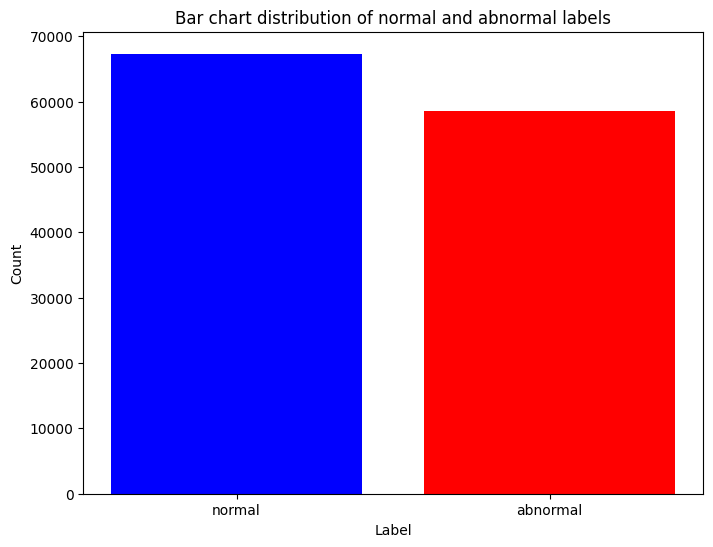

In [ ]:
import matplotlib.pyplot as plt

# Assuming bin_data is your DataFrame and it has a 'label' column
label_counts = bin_data.label.value_counts()

plt.figure(figsize=(8,6))
plt.bar(label_counts.index, label_counts.values, color=['blue', 'red'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar chart distribution of normal and abnormal labels')
plt.show()

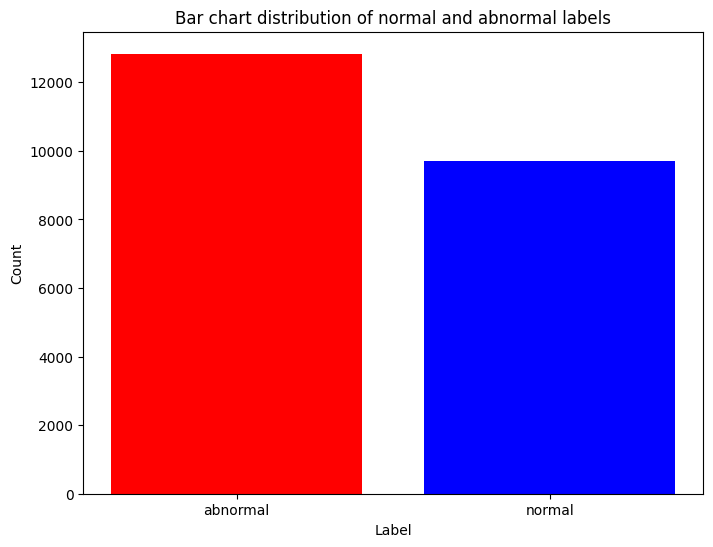

In [ ]:
import matplotlib.pyplot as plt

# Assuming bin_data is your DataFrame and it has a 'label' column
label_counts_Test = bin_data_Test.label.value_counts()

plt.figure(figsize=(8,6))
plt.bar(label_counts_Test.index, label_counts_Test.values, color=['red', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Bar chart distribution of normal and abnormal labels')
plt.show()

Feature Extraction

This code creates a dataframe that contains only the numeric attributes from the binary class dataset, bin_data, along with the encoded attack label, intrusion. It then calculates the Pearson correlation between numeric attributes and the attack label using the corr() method and identifies those attributes that have a correlation greater than 0.5 with the encoded label. It selects the most highly correlated attributes and filters the dataset for only these attributes. It then joins the selected numeric attributes with the one-hot encoded categorical features, `categorical`. Finally, it constructs the final dataset from the numeric, categorical, and attack label columns. The output is then written to a CSV file called "bin_data.csv," which includes the preprocessed dataset for binary classification, ready for further analysis or model training.

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_bin = bin_data[numeric_col]
numeric_bin['intrusion'] = bin_data['intrusion']

In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr= numeric_bin.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.576444
srv_serror_rate             0.648289
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
attack_state                1.000000
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [ ]:
# saving final dataset to disk
bin_data.to_csv("bin_data.csv")
# final dataset for binary classification
bin_data

count  srv_serror_rate  serror_rate  dst_host_serror_rate  \
0      -0.717045        -0.631929    -0.637209             -0.639532   
1      -0.620982        -0.631929    -0.637209             -0.639532   
2       0.339648         1.605104     1.602664              1.608759   
3      -0.690846        -0.184522    -0.189235             -0.572083   
4      -0.472521        -0.631929    -0.637209             -0.639532   
...          ...              ...          ...                   ...   
125968  0.872361         1.605104     1.602664              1.608759   
125969 -0.717045        -0.631929    -0.637209             -0.639532   
125970 -0.725778        -0.631929    -0.637209              0.979238   
125971  0.523041         1.605104     1.602664              1.608759   
125972 -0.725778        -0.631929    -0.637209             -0.639532   

        dst_host_srv_serror_rate  logged_in  dst_host_same_srv_rate  \
0                      -0.624871  -0.809262               -0.782367   
1                      -0.624871  -0.809262               -1.161030   
2                       1.618955  -0.809262               -0.938287   
3                      -0.602433   1.235694                1.066401   
4                      -0.624871   1.235694                1.066401   
...                          ...        ...                     ...   
125968                  1.618955  -0.809262               -0.938287   
125969                 -0.624871  -0.809262                0.977304   
125970                 -0.624871   1.235694               -0.893738   
125971                  1.618955  -0.809262               -1.094207   
125972                 -0.624871   1.235694               -0.492801   

        dst_host_srv_count  same_srv_rate  protocol_type_icmp  ...  flag_S0  \
0                -0.818890       0.771283               False  ...    False   
1                -1.035688      -1.321428               False  ...    False   
2                -0.809857      -1.389669               False  ...     True   
3                 1.258754       0.771283               False  ...    False   
4                 1.258754       0.771283               False  ...    False   
...                    ...            ...                 ...  ...      ...   
125968           -0.818890      -1.184947               False  ...     True   
125969            1.159389       0.771283               False  ...    False   
125970           -0.773724       0.771283               False  ...    False   
125971           -0.972455      -1.366922               False  ...     True   
125972           -0.349162       0.771283               False  ...    False   

        flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  intrusion  abnormal  \
0         False    False    False     True    False          1     False   
1         False    False    False     True    False          1     False   
2         False    False    False    False    False          0      True   
3         False    False    False     True    False          1     False   
4         False    False    False     True    False          1     False   
...         ...      ...      ...      ...      ...        ...       ...   
125968    False    False    False    False    False          0      True   
125969    False    False    False     True    False          1     False   
125970    False    False    False     True    False          1     False   
125971    False    False    False    False    False          0      True   
125972    False    False    False     True    False          1     False   

        normal     label  
0         True    normal  
1         True    normal  
2        False  abnormal  
3         True    normal  
4         True    normal  
...        ...       ...  
125968   False  abnormal  
125969    True    normal  
125970    True    normal  
125971   False  abnormal  
125972    True    normal  

[125973 rows x 97 columns]

This code processes the testing dataset, bin_data_Test, in the same way that it did to the training dataset. It first creates a dataframe comprising the numeric attributes from bin_data_Test and the encoded attack label, intrusion. It then calculates the Pearson correlation coefficient between numeric attributes and the encoded attack label and identifies those numeric attributes that have a correlation of greater than 0.5. The selected attributes are filtered out and saved in numeric_bin_Test. These numeric attributes are then joined with the one-hot encoded categorical features (`categorical`), and the encoded attack labels are added. Finally, it constructs the dataset by combining numeric, categorical, and attack label columns and saves it to a CSV file named "bin_data_Test.csv." The final dataset is now ready for binary classification analysis or model training.

In [ ]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_bin_Test = bin_data_Test[numeric_col]
numeric_bin_Test['intrusion'] = bin_data_Test['intrusion']

In [ ]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute
corr_Test= numeric_bin_Test.corr()
corr_y_Test = abs(corr_Test['intrusion'])
highest_corr_Test = corr_y_Test[corr_y >0.5]
highest_corr_Test.sort_values(ascending=True)

count                       0.281192
srv_serror_rate             0.293143
serror_rate                 0.293763
dst_host_serror_rate        0.298771
dst_host_srv_serror_rate    0.300255
same_srv_rate               0.510634
logged_in                   0.551159
dst_host_same_srv_rate      0.575526
dst_host_srv_count          0.593344
attack_state                1.000000
intrusion                   1.000000
Name: intrusion, dtype: float64

In [ ]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin_Test = bin_data_Test[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [ ]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin_Test = numeric_bin_Test.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data_Test = numeric_bin_Test.join(bin_data_Test[['intrusion','abnormal','normal','label']])

In [ ]:
# saving final dataset to disk
bin_data_Test.to_csv("bin_data_Test.csv")
# final dataset for binary classification
bin_data_Test

count  srv_serror_rate  serror_rate  dst_host_serror_rate  \
0        229             0.00          0.0                  0.00   
1        136             0.00          0.0                  0.00   
2          1             0.00          0.0                  0.00   
3          1             0.00          0.0                  0.00   
4          1             0.12          0.0                  0.00   
...      ...              ...          ...                   ...   
22539      1             0.00          0.0                  0.01   
22540      2             0.00          0.0                  0.01   
22541      5             0.00          0.0                  0.00   
22542      4             0.00          0.0                  0.00   
22543      4             0.00          0.0                  0.00   

       dst_host_srv_serror_rate  logged_in  dst_host_same_srv_rate  \
0                           0.0          0                    0.04   
1                           0.0          0                    0.00   
2                           0.0          0                    0.61   
3                           0.0          0                    1.00   
4                           0.0          0                    0.31   
...                         ...        ...                     ...   
22539                       0.0          1                    0.72   
22540                       0.0          1                    1.00   
22541                       0.0          1                    1.00   
22542                       0.0          0                    0.99   
22543                       0.0          0                    0.08   

       dst_host_srv_count  same_srv_rate  protocol_type_icmp  ...  flag_S0  \
0                      10           0.04               False  ...    False   
1                       1           0.01               False  ...    False   
2                      86           1.00               False  ...     True   
3                      57           1.00               False  ...    False   
4                      86           1.00               False  ...    False   
...                   ...            ...                 ...  ...      ...   
22539                 141           1.00               False  ...    False   
22540                 255           1.00               False  ...    False   
22541                 255           1.00               False  ...    False   
22542                 252           1.00               False  ...    False   
22543                  21           0.25               False  ...    False   

       flag_S1  flag_S2  flag_S3  flag_SF  flag_SH  intrusion  abnormal  \
0        False    False    False     True    False          0      True   
1        False    False    False     True    False          0      True   
2        False    False    False    False    False          1     False   
3        False    False    False     True    False          0      True   
4        False    False    False     True    False          0      True   
...        ...      ...      ...      ...      ...        ...       ...   
22539    False    False    False     True    False          1     False   
22540    False    False    False     True    False          1     False   
22541    False    False    False    False    False          0      True   
22542    False    False    False     True    False          1     False   
22543    False    False    False    False    False          0      True   

       normal     label  
0       False  abnormal  
1       False  abnormal  
2        True    normal  
3       False  abnormal  
4       False  abnormal  
...       ...       ...  
22539    True    normal  
22540    True    normal  
22541   False  abnormal  
22542    True    normal  
22543   False  abnormal  

[22544 rows x 97 columns]

It works on the preparation of both training and testing datasets required for model training and its subsequent evaluation. This script begins by importing the main libraries: `train_test_split` and `SVC`, and metrics from `sklearn`. Feature extraction involves creating a variable, X, for the predictor set with all columns in `bin_data`, except the target (`intrusion`). Y is created as another variable consisting only of `intrusion`. The dataset is split into training and testing sets, using 75% of the data for training and 25% for testing, with a fixed random state for reproducibility. The same steps are repeated for the `bin_data_Test` dataset, ensuring consistent preparation for both datasets. The above will generate training and testing subsets for both the training and test data sets that now can be used to train and test a model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = bin_data_Test.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data_Test['intrusion'] # target attribute

# splitting the dataset 75% for training and 25% testing
X_train_forTestdata, X_test_forTestdata, y_train_forTestdata, y_test_forTestdata = train_test_split(X,Y, test_size=0.25, random_state=42)

In [ ]:
!pip install catboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

This code defines the following list of classifiers: Logistic Regression, Extra Trees Classifier, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM). For each classifier, the model is fitted on the data using `X_train` and `y_train`, and predictions are made on the test data (`X_test`). For each classifier, it prints out the accuracy score, confusion matrix, and detailed classification report containing metrics such as precision, recall, and F1 score. Then, it creates a DataFrame, `predictions_df`, that will hold the predicted labels (`intrusion`) for each classifier. In this way, each classifier is thoroughly evaluated with respect to the confusion matrix in order to interpret the classifier's prediction errors.

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
classifiers = [
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()]
]

predictions_df = pd.DataFrame()
predictions_df['intrusion'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)
    print(classification_report(y_test, predictions))

LogisticRegression : 0.9697402679875532
[[14096   624]
 [  329 16445]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     14720
           1       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494

ExtraTreesClassifier : 0.9867276306598082
[[14506   214]
 [  204 16570]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494

DecisionTree : 0.9854575474693592
[[14496   224]
 [  234 16540]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     14720
           1       0.99     

This code uses the Voting Classifier, which is a basic ensemble strategy that combines a set of independent models to improve the performance of each individual model on making predictions. Three classifiers are to be used: Decision Tree (`clf1`), Random Forest (`clf2`), and Extra Trees Classifier (`clf3`). These models will be used in a soft voting ensemble, with the final prediction derived from predicted probabilities rather than class labels voted on by majority. The `VotingClassifier` is fitted on the `X_train`-`y_train` data. Subsequently, predictions are made on the `X_test` data. Then, classification report including the metrics such as precision, recall and F1-score is performed. By using this approach, advantages of different models can be obtained, probably better than one simple classifier.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = ExtraTreesClassifier()
eclf1 = VotingClassifier(estimators=[('DT', clf1), ('RF', clf2), ('ET', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



This code assesses the performance of the Voting Classifier by computing its accuracy on the test data first, using `y_test` and `predictions`. The accuracy score is printed in the form of a percentage. Then it creates a confusion matrix with the `confusion_matrix` function, showing classification reports including precision, recall, and F1-score. The confusion matrix is plotted using the `plot_confusion_matrix` function from the `mlxtend` library. The labels for "No Attack" and "Attack" classes are personalized for both the x-axis and y-axis. It plots the results with a color map (`plt.cm.Blues`) to enhance clarity of the matrix, and it sets a title of the plot as "Voting Classifier Model - Confusion Matrix." This provides a detailed evaluation of the performance of the Voting Classifier.

Accuracy of Voting Classifier is :  98.68%
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



<Figure size 640x480 with 0 Axes>

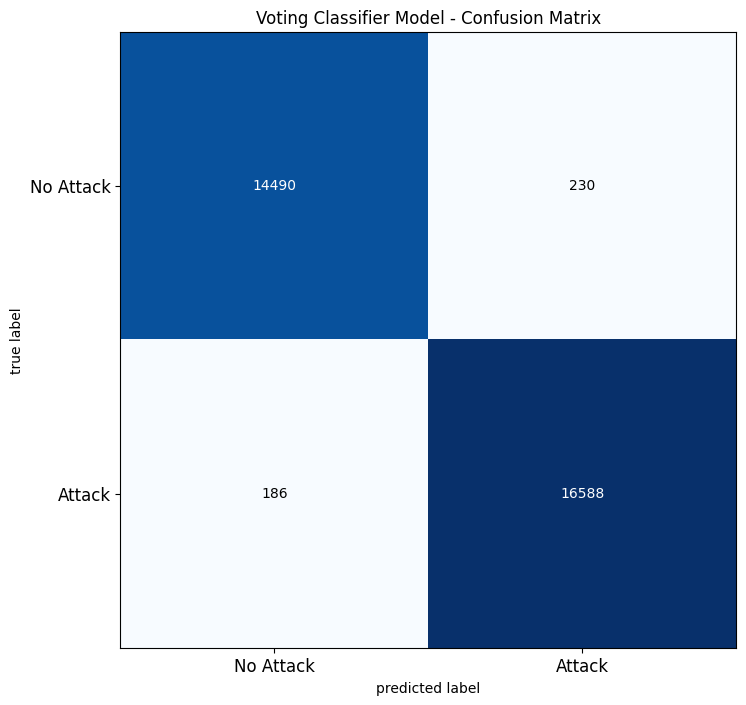

In [ ]:
vot_acc = accuracy_score(y_test, predictions)
print("Accuracy of Voting Classifier is : ", "{:.2f}%".format(100*vot_acc ))
#plotting the confussion matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.title("Voting Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.yticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.show()

Below is a creation of another Voting Classifier, this time with "hard" voting strategy (eclf2), which predicts based on the majority vote for the class among the individual classifiers: Decision Tree, Random Forest, and Extra Trees. The classifier trains on X_train and y_train before making predictions on X_test. Some performance metrics, such as precision, recall, F1-score, and support, are listed for each class in the classification report of the predictions.

In [ ]:
eclf2 = VotingClassifier(estimators=[('DT', clf1), ('RF', clf2), ('ET', clf3)], voting='hard')
eclf2.fit(X_train, y_train)
predictions1 = eclf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



It then measures the performance of the second Voting Classifier, eclf2, which uses DecisionTreeClassifier, RandomForestClassifier, and ExtraTreesClassifier with a hard vote. The accuracy of the model is computed by comparing the model's predictions, predictions1, against the actual labels, y_test, and is printed out as a percentage. The code also generates and visualizes the confusion matrix using `plot_confusion_matrix` from the `mlxtend` library, where the axes labels are set for the classes "No Attack" and "Attack." It prints out a classification report, which gives a proper breakdown of the performance, including precision, recall, F1-score, and support of the classes. This allows for an effective review of the model's ability to differentiate between normal and abnormal network traffic.

Accuracy of Voting Classifier is :  98.68%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



<Figure size 640x480 with 0 Axes>

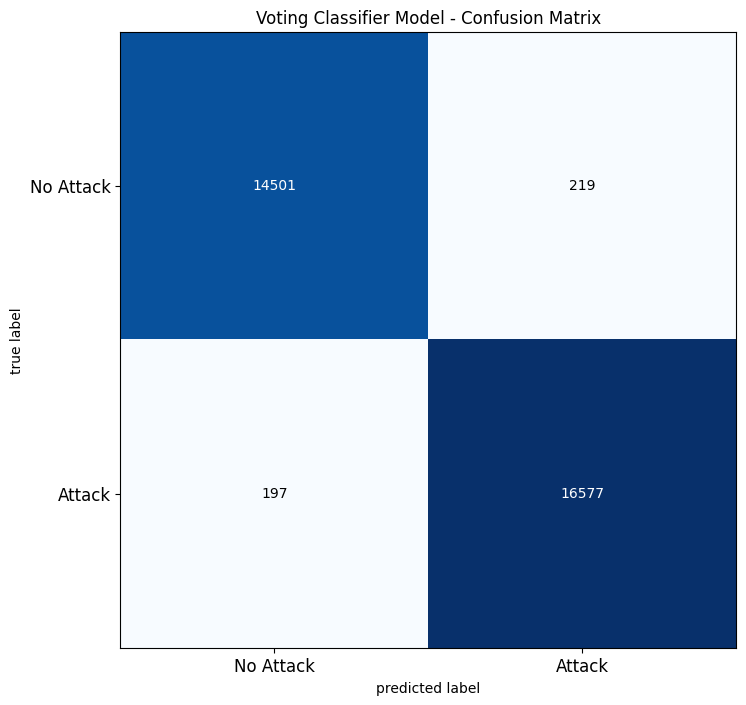

In [ ]:
vot_acc = accuracy_score(y_test, predictions1)
print("Accuracy of Voting Classifier is : ", "{:.2f}%".format(100*vot_acc ))
#plotting the confussion matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, predictions1)
print(classification_report(y_test, predictions1))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.title("Voting Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.yticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

This code applies a series of classifiers on the test dataset to see how each performs in network intrusion detection. First, it initializes a list of classifiers, including Logistic Regression, Extra Trees, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbors, and Support Vector Machine (SVM). The classifiers are then trained on the training subset of the test data and evaluated on the test subset. Here, the code for each classifier calculates the accuracy score, generates the confusion matrix, and prints out the classification report, including precision, recall, F1-score, and support. Also, a confusion matrix for each model will be displayed to visualize how well the classifier is separating normal and abnormal traffic. This will serve as the process to compare various classifiers on the test data.

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
classifiers = [
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()]
]

predictions_df = pd.DataFrame()
predictions_df['intrusion'] = y_test_forTestdata

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train_forTestdata, y_train_forTestdata.ravel())
    predictions = classifier.predict(X_test_forTestdata)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test_forTestdata, predictions))
    cm = confusion_matrix(y_test_forTestdata, predictions)
    print(cm)
    print(classification_report(y_test_forTestdata, predictions))

LogisticRegression : 0.8131653655074521
[[2453  762]
 [ 291 2130]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      3215
           1       0.74      0.88      0.80      2421

    accuracy                           0.81      5636
   macro avg       0.82      0.82      0.81      5636
weighted avg       0.83      0.81      0.81      5636

ExtraTreesClassifier : 0.8834279630943932
[[2927  288]
 [ 369 2052]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3215
           1       0.88      0.85      0.86      2421

    accuracy                           0.88      5636
   macro avg       0.88      0.88      0.88      5636
weighted avg       0.88      0.88      0.88      5636

DecisionTree : 0.8930092264017033
[[2921  294]
 [ 309 2112]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3215
           1       0.88      0.87      0

This code implements a soft voting ensemble classifier for the performance evaluation of the Decision Tree, Random Forest, and Extra Trees classifiers, represented by `clf1_forTestdata`, `clf2_forTestdata`, and `clf3_forTestdata`, respectively. In the `VotingClassifier`, the predictions from these three classifiers are combined using the soft voting method, where the final prediction is based on the predicted probabilities from each classifier. After training the ensemble model with the training data, it will make predictions on the test data. Then, it prints out the classification report that contains some important evaluation metrics of the model, such as precision, recall, F1-score, and support for each class (normal and abnormal). This helps improve the accuracy of classification by exploiting the strengths of multiple classifiers.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1_forTestdata = DecisionTreeClassifier()
clf2_forTestdata = RandomForestClassifier()
clf3_forTestdata = ExtraTreesClassifier()
eclf1_forTestdata = VotingClassifier(estimators=[('DT', clf1_forTestdata), ('RF', clf2_forTestdata), ('ET', clf3_forTestdata)], voting='soft')
eclf1_forTestdata.fit(X_train_forTestdata, y_train_forTestdata)
predictions = eclf1_forTestdata.predict(X_test_forTestdata)
print(classification_report(y_test_forTestdata, predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3215
           1       0.89      0.87      0.88      2421

    accuracy                           0.90      5636
   macro avg       0.90      0.90      0.90      5636
weighted avg       0.90      0.90      0.90      5636



Next, this code will evaluate the performance of the voting classifier: This piece of code calculates the performance score with its accuracy score; therefore, it computes first, then prints out its accuracy as a percentage. Plot a confusion matrix showing how many true positives, true negatives, false positives, and false negatives there are, using `mlxtend.plotting.plot_confusion_matrix`. The plot is customized with axis labels for "No Attack" and "Attack," and then displayed with a blue color map to be clearer. Also, it makes use of the `classification_report()` function to output key performance metrics that include precision, recall, and F1-score, allowing the determination of detailed performance for this classifier.

Accuracy of Voting Classifier is :  89.89%
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3215
           1       0.89      0.87      0.88      2421

    accuracy                           0.90      5636
   macro avg       0.90      0.90      0.90      5636
weighted avg       0.90      0.90      0.90      5636



<Figure size 640x480 with 0 Axes>

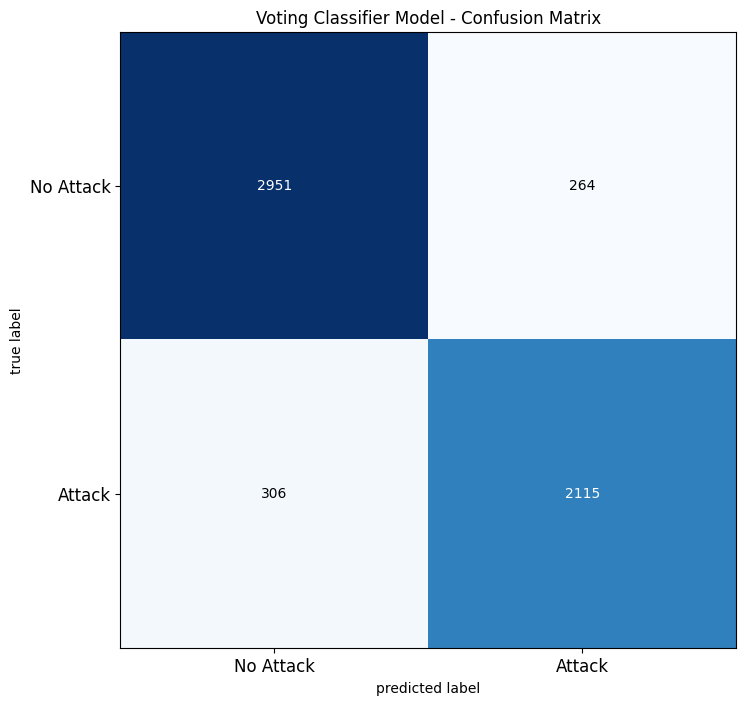

In [ ]:
vot_acc = accuracy_score(y_test_forTestdata, predictions)
print("Accuracy of Voting Classifier is : ", "{:.2f}%".format(100*vot_acc ))
#plotting the confussion matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test_forTestdata, predictions)
print(classification_report(y_test_forTestdata, predictions))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.title("Voting Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.yticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.show()

In the following code, a new voting classifier `eclf2_forTestdata` is instantiated with three classifiers: DecisionTreeClassifier, RandomForestClassifier, and ExtraTreesClassifier, using hard voting. The classifier is trained on the training data using the `fit()` method. Once the model is trained, the code makes predictions on the test data using the `predict()` method. The results are stored in the `predictions1` variable. The performance of the model is then gauged with the help of `classification_report()`, giving the key metrics such as precision, recall, and F1-score for each class in normal and attack classes. This process will give the assurance of accuracy and effectiveness in the hard-voting ensemble model.

In [ ]:
eclf2_forTestdata = VotingClassifier(estimators=[('DT', clf1_forTestdata), ('RF', clf2_forTestdata), ('ET', clf3_forTestdata)], voting='hard')
eclf2_forTestdata.fit(X_train_forTestdata, y_train_forTestdata)
predictions1 = eclf2_forTestdata.predict(X_test_forTestdata)
print(classification_report(y_test_forTestdata, predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3215
           1       0.89      0.87      0.88      2421

    accuracy                           0.90      5636
   macro avg       0.90      0.90      0.90      5636
weighted avg       0.90      0.90      0.90      5636



Herein, the accuracy of the hard-voting classifier-eclf2_forTestdata will be determined using the accuracy_score() function by comparing predictions, predictions1, against the actual labels, y_test_forTestdata. The result will be printed out as a percentage. Also, the confusion matrix will be created using the confusion_matrix() function for the assessment of the performance of this model in terms of true positives, false positives, true negatives, and false negatives. The `classification_report()` function is then used to provide the metrics in detail, such as precision, recall, and F1-score for each class: No Attack and Attack. Finally, the confusion matrix is plotted using `plot_confusion_matrix()` from the `mlxtend.plotting` library, where the color map, axis labels, and title are customized for clarity. This helps in visualizing how well the classifier is performing in terms of correctly predicting normal and abnormal attack classes.

Accuracy of Voting Classifier is :  89.27%
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3215
           1       0.89      0.85      0.87      2421

    accuracy                           0.89      5636
   macro avg       0.89      0.89      0.89      5636
weighted avg       0.89      0.89      0.89      5636



<Figure size 640x480 with 0 Axes>

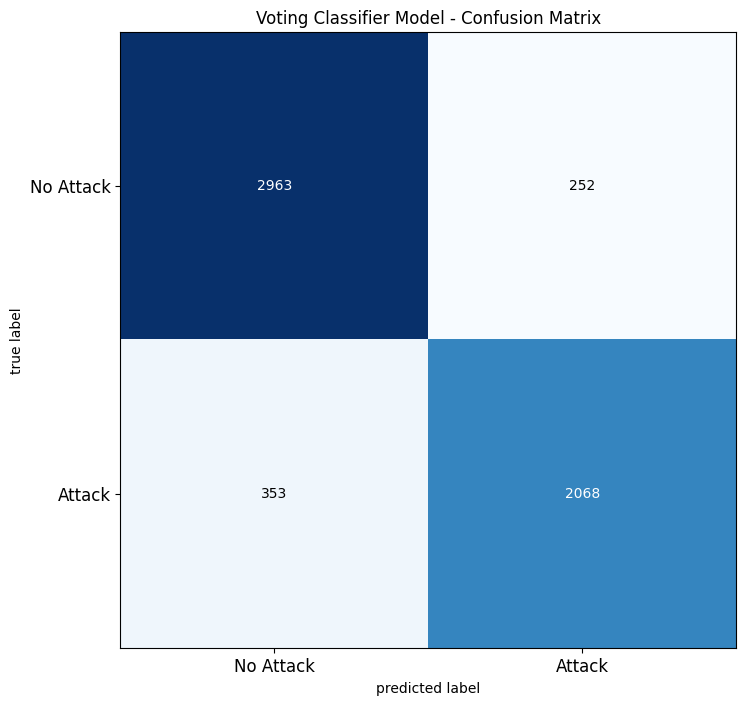

In [ ]:
vot_acc = accuracy_score(y_test_forTestdata, predictions1)
print("Accuracy of Voting Classifier is : ", "{:.2f}%".format(100*vot_acc ))
#plotting the confussion matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test_forTestdata, predictions1)
print(classification_report(y_test_forTestdata, predictions1))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.title("Voting Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.yticks(range(2), ["No Attack","Attack"], fontsize=12)
plt.show()

In [ ]:
!pip install lime
!pip install shap

This code prepares the data by converting `X_train` and `X_test` into pandas DataFrames to ensure that all their features are numeric. For that, it uses the method `apply(pd.to_numeric)` in order to convert any value into numeric (in case) and afterwards convert them back to numpy arrays to train the model. First, create a VotingClassifier with three base classifiers: DecisionTreeClassifier, RandomForestClassifier, and ExtraTreesClassifier with soft voting, and train it on the data. The classification report provides metrics like precision, recall, and F1-score that give insight into the model's performance. To interpret the model, use LIME, which explains predictions of the VotingClassifier. A `LimeTabularExplainer` is created with the training data, among other parameters, and an explanation is generated for a certain test instance (`X_test[0]`). The explanation shows the contribution of each feature to the model's prediction and is displayed in the notebook to help interpret how the model arrived at its decision.

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import shap
from lime import lime_tabular
import numpy as np

# Assuming X_train and X_test are initially numpy arrays
# Convert them to pandas DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Ensure all data is numeric
X_train_df = X_train_df.apply(pd.to_numeric, errors='coerce')
X_test_df = X_test_df.apply(pd.to_numeric, errors='coerce')

# Convert back to numpy arrays if needed
X_train = X_train_df.values
X_test = X_test_df.values

# Define classifiers and VotingClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = ExtraTreesClassifier()
eclf1 = VotingClassifier(estimators=[('DT', clf1), ('RF', clf2), ('ET', clf3)], voting='soft')

# Fit the VotingClassifier
eclf1.fit(X_train, y_train)

# Make predictions
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

# LIME explanations
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=X_train_df.columns,
    class_names=['abnormal', 'normal'],
    mode='classification'
)

exp = explainer_lime.explain_instance(
    data_row=X_test[0],
    predict_fn=eclf1.predict_proba
)

exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14720
           1       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



This code shows how to apply a `VotingClassifier` with decision trees, random forests, and extra trees classifiers for a dataset and also explain the model's predictions using LIME (Local Interpretable Model-agnostic Explanations). First, the `X_train_forTestdata` and `X_test_forTestdata` numpy arrays are converted into pandas DataFrames to ensure the data is numeric, using `apply(pd.to_numeric)` to handle any non-numeric values. With this, the data is then taken out back to numpy arrays after numeric assurance of the DataFrames. Defining a `VotingClassifier` with soft voting by combing `DecisionTreeClassifier`, `RandomForestClassifier` and `ExtraTreesClassifier`. Then, train a classifier using the training data and make predictions for test data. Evaluate the model's performance on the test data using a classification report, which will include accuracy and other metrics such as precision, recall, and F1-score. The explanation of the prediction with LIME is utilized here. The `LimeTabularExplainer` is initiated on training data, explaining the model's decisions using a certain instance as a test case, in this context - `X_test_forTestdata[0]`. The explanation displays feature contribution to the prediction or the insights on how a certain decision has been achieved.

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import shap
from lime import lime_tabular
import numpy as np

# Assuming X_train and X_test are initially numpy arrays
# Convert them to pandas DataFrames
X_train_df_forTestdata = pd.DataFrame(X_train_forTestdata)
X_test_df_forTestdata = pd.DataFrame(X_test_forTestdata)

# Ensure all data is numeric
X_train_df_forTestdata = X_train_df_forTestdata.apply(pd.to_numeric, errors='coerce')
X_test_df_forTestdata = X_test_df_forTestdata.apply(pd.to_numeric, errors='coerce')

# Convert back to numpy arrays if needed
X_train_forTestdata = X_train_df_forTestdata.values
X_test_forTestdata = X_test_df_forTestdata.values

# Define classifiers and VotingClassifier
clf1_forTestdata = DecisionTreeClassifier()
clf2_forTestdata = RandomForestClassifier()
clf3_forTestdata = ExtraTreesClassifier()
eclf1_forTestdata = VotingClassifier(estimators=[('DT', clf1_forTestdata), ('RF', clf2_forTestdata), ('ET', clf3_forTestdata)], voting='soft')

# Fit the VotingClassifier
eclf1_forTestdata.fit(X_train_forTestdata, y_train_forTestdata)

# Make predictions
predictions = eclf1_forTestdata.predict(X_test_forTestdata)
print(classification_report(y_test_forTestdata, predictions))

# LIME explanations
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train_forTestdata,
    feature_names=X_train_df_forTestdata.columns,
    class_names=['abnormal', 'normal'],
    mode='classification'
)

exp = explainer_lime.explain_instance(
    data_row=X_test_forTestdata[0],
    predict_fn=eclf1_forTestdata.predict_proba
)

exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3215
           1       0.89      0.87      0.88      2421

    accuracy                           0.90      5636
   macro avg       0.90      0.89      0.89      5636
weighted avg       0.90      0.90      0.90      5636



Reading Data

The code snippet provided loads two datasets, `KDDTrain+.txt` and `KDDTest+.txt`, into pandas DataFrames using `pd.read_csv()` with a comma separator and UTF-8 encoding. The `Trained_Data` and `Tested_Data` DataFrames represent the training and testing datasets for a classification task, where the data contains various network-related features such as `duration`, `protocol_type`, `service`, and `attack` labels, among others. After loading the datasets, the code renames the columns of DataFrames with predefined lists of column names, which include features of network connections and the target label, `attack`, for the type of attack or normal traffic. This setup prepares the data for further processing, analysis, and model training.

In [ ]:
Trained_Data = pd.read_csv("KDDTrain+.txt" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("KDDTest+.txt" , sep = "," , encoding = 'utf-8')


Columns Modification

In [ ]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [ ]:
Trained_Data.columns = Columns
Tested_Data.columns  = Columns

Data Analysis

This function, `unique_values()`, has been designed to print unique values and their counts for the specified columns in a given DataFrame. This function iterates over each column in the provided list of columns, extracts unique values and their corresponding counts, and prints them for each column. In the example code, this function is applied to the `Trained_Data` DataFrame by selecting categorical features via `select_dtypes(include='object')`, which will identify columns of type `object`. These categorical columns are then mapped to the unique_values() function, which outputs the frequency of unique values in each column. This will provide an idea of the distribution of these categorical variables in this dataset and, therefore, will help in subsequent pre-processing and analysis.

In [ ]:
def unique_values(df, columns):
    '''
    Prints the unique values and their counts for the specified columns
    in the given DataFrame.
    '''
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        # Extract unique values and their counts
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        # Print the unique values and their counts
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

# Select categorical features (object type) in the NSL-KDD dataset
cat_features = Trained_Data.select_dtypes(include='object').columns

# Call the function to print unique values and counts for categorical features
unique_values(Trained_Data, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

Exploring Responses

The code extracts the unique values from the `attack` column in the `Trained_Data` DataFrame by using `set(Trained_Data['attack'].values)`, which ensures that only distinct attack types are included. It then prints these unique values, which represent the different attack types in the dataset. The use of `set()` is important because it removes any duplicates, and the `print()` statement outputs the distinct attack types as a space-separated list. The result would typically show a collection of different attack labels found in the `attack` column, such as "normal," "back," "neptune," etc., depending on the dataset's content.

In [ ]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'nmap', 'warezclient', 'normal', 'portsweep', 'neptune', 'ftp_write', 'imap', 'teardrop', 'loadmodule', 'smurf', 'buffer_overflow', 'back', 'phf', 'ipsweep', 'multihop', 'perl', 'satan', 'pod', 'spy', 'warezmaster', 'rootkit', 'land', 'guess_passwd'} 

Classifying the Attack Results

The code below converts the `attack` column of both the `Trained_Data` and `Tested_Data` DataFrames into binary labels by mapping the values. In essence, it maps the label `'normal'` to 0, meaning no attack, and every other attack type to 1, meaning an attack. It does this by using the `map()` function with a lambda that checks the value of each entry in the `attack` column. The result of this is binary labels that are stored in new columns named `attack_state` in both datasets. The `head(10)` method has been called on both DataFrames to show the first 10 rows so you can see the data and verify that the column `attack_state` has been added as expected. This is a good cleaning step to prepare the data for machine learning tasks where binary classification is required.

In [ ]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)

Trained_Data['attack_state'] = Trained_attack
Tested_Data['attack_state'] = Tested_attack

In [ ]:


Trained_Data.head(10)



duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           udp       other   SF        146          0     0   
1         0           tcp     private   S0          0          0     0   
2         0           tcp        http   SF        232       8153     0   
3         0           tcp        http   SF        199        420     0   
4         0           tcp     private  REJ          0          0     0   
5         0           tcp     private   S0          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp  remote_job   S0          0          0     0   
8         0           tcp     private   S0          0          0     0   
9         0           tcp     private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.60   
1               0       0    0  ...                    0.05   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.07   
5               0       0    0  ...                    0.05   
6               0       0    0  ...                    0.07   
7               0       0    0  ...                    0.05   
8               0       0    0  ...                    0.06   
9               0       0    0  ...                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.88                         0.00   
1                         0.00                         0.00   
2                         0.03                         0.04   
3                         0.00                         0.00   
4                         0.00                         0.00   
5                         0.00                         0.00   
6                         0.00                         0.00   
7                         0.00                         0.00   
8                         0.00                         0.00   
9                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                   0.0   
1                  1.00                      1.00                   0.0   
2                  0.03                      0.01                   0.0   
3                  0.00                      0.00                   0.0   
4                  0.00                      0.00                   1.0   
5                  1.00                      1.00                   0.0   
6                  1.00                      1.00                   0.0   
7                  1.00                      1.00                   0.0   
8                  1.00                      1.00                   0.0   
9                  0.00                      0.00                   1.0   

   dst_host_srv_rerror_rate   attack  level  attack_state  
0                      0.00   normal     15             0  
1                      0.00  neptune     19             1  
2                      0.01   normal     21             0  
3                      0.00   normal     21             0  
4                      1.00  neptune     21             1  
5                      0.00  neptune     21             1  
6                      0.00  neptune     21             1  
7                      0.00  neptune     21             1  
8                      0.00  neptune     21             1  
9                      1.00  neptune     21             1  

[10 rows x 44 columns]

In [ ]:


Tested_Data.head(10)



duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         2           tcp  ftp_data    SF      12983          0     0   
2         0          icmp     eco_i    SF         20          0     0   
3         1           tcp    telnet  RSTO          0         15     0   
4         0           tcp      http    SF        267      14515     0   
5         0           tcp      smtp    SF       1022        387     0   
6         0           tcp    telnet    SF        129        174     0   
7         0           tcp      http    SF        327        467     0   
8         0           tcp       ftp    SF         26        157     0   
9         0           tcp    telnet    SF          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.06   
1               0       0    0  ...                    0.04   
2               0       0    0  ...                    0.00   
3               0       0    0  ...                    0.17   
4               0       0    0  ...                    0.00   
5               0       0    0  ...                    0.72   
6               0       0    0  ...                    0.00   
7               0       0    0  ...                    0.00   
8               0       0    0  ...                    0.08   
9               0       0    0  ...                    0.01   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.61                         0.02   
2                         1.00                         0.28   
3                         0.03                         0.02   
4                         0.01                         0.03   
5                         0.00                         0.00   
6                         0.00                         0.00   
7                         0.01                         0.03   
8                         0.02                         0.00   
9                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  1.00   
1                  0.00                      0.00                  0.00   
2                  0.00                      0.00                  0.00   
3                  0.00                      0.00                  0.83   
4                  0.01                      0.00                  0.00   
5                  0.00                      0.00                  0.72   
6                  0.01                      0.01                  0.02   
7                  0.00                      0.00                  0.00   
8                  0.00                      0.00                  0.00   
9                  0.00                      0.00                  0.66   

   dst_host_srv_rerror_rate        attack  level  attack_state  
0                      1.00       neptune     21             1  
1                      0.00        normal     21             0  
2                      0.00         saint     15             1  
3                      0.71         mscan     11             1  
4                      0.00        normal     21             0  
5                      0.04        normal     21             0  
6                      0.02  guess_passwd     15             1  
7                      0.00        normal     21             0  
8                      0.00  guess_passwd      7             1  
9                      0.32         mscan      9             1  

[10 rows x 44 columns]

Handling Outliers

The `shape` attribute of a DataFrame provides the dimensions of the dataset, indicating the number of rows (instances) and columns (features). By using `Trained_Data.shape` and `Tested_Data.shape`, you can obtain the size of the training and testing datasets, respectively. For example, if the training dataset has 1000 instances and 42 features, `Trained_Data.shape` would return `(1000, 42)`. Similarly, `Tested_Data.shape` will return the number of instances and features in the testing dataset, allowing you to understand the size and structure of both datasets.

In [ ]:
Trained_Data.shape

(125972, 44)

In [ ]:
Tested_Data.shape

(22543, 44)

Data Encoding

In this code, `pd.get_dummies` is used to one-hot encode the categorical columns 'protocol_type', 'service', and 'flag' in both the training and testing datasets. By setting `prefix=""` and `prefix_sep=""`, it generates binary columns for each unique category without any column name prefix, turning these categorical variables into multiple binary variables. Then, a `LabelEncoder` is used on the target variable `'attack'`, which is used to convert the categorical labels (like "normal" and "anomaly") into numerical values. This is done by encoding these labels using the `fit_transform` method so that both training and testing datasets align with the same encoding for attack labels. This step is important for the preparation of data in a way that machine learning algorithms, which take numerical input and provide numerical output, can use.

In [ ]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [ ]:


Tested_Data = pd.get_dummies(Tested_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")



In [ ]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])
Tested_Data['attack'] = attack_LE.fit_transform(Tested_Data["attack"])

Data Splitting

The code snippet first prepares the feature matrices, `X_train` and `X_test`, by removing the target variable columns from both the training and testing datasets, respectively. These columns are 'attack', 'level', and 'attack_state'. It then assigns the 'attack_state' column to the target variables, Y_train and Y_test, which flag the presence or absence of an attack. The `train_test_split` function will be used to divide both datasets into training and testing sets, allocating 25% for testing and 75% for training. Additionally, the random seed is set for reproducibility. These splits will be stored in separate variables for the training and test sets (`X_train_train`, `X_test_train`, `Y_train_train`, `Y_test_train` for the training data, and `X_train_test`, `X_test_test`, `Y_train_test`, `Y_test_test` for the test data) that will subsequently be used for model evaluation and training.

In [ ]:
X_train = Trained_Data.drop('attack', axis = 1)
X_train = Trained_Data.drop('level', axis = 1)
X_train = Trained_Data.drop('attack_state', axis = 1)

X_test = Tested_Data.drop('attack', axis = 1)
X_test = Tested_Data.drop('level', axis = 1)
X_test = Tested_Data.drop('attack_state', axis = 1)


Y_train = Trained_Data['attack_state']
Y_test = Tested_Data['attack_state']

In [ ]:
X_train_train,X_test_train ,Y_train_train,Y_test_train = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)
X_train_test,X_test_test,Y_train_test,Y_test_test = train_test_split(X_test, Y_test, test_size= 0.25 , random_state=42)

Data Scaling

This code scales the feature data of the training and test sets using `RobustScaler` from `sklearn`. It scales X_train_train by using `fit_transform`, where it first calculates scaling parameters - for instance, median and interquartile range-from training data and then performs the transform. Then it scales the `X_test_train` by transforming according to the learned parameters in `X_train_train`. Similarly, `X_train_test` is scaled using `fit_transform`, while `X_test_test` is scaled using the transformation learned from `X_train_test`. This scaling technique is more robust to outliers than standard scaling methods, as it uses the median and interquartile range instead of the mean and standard deviation. Finally, the code checks the shapes of the resulting scaled datasets: X_train_train, X_test_train, X_train_test, X_test_test, and target arrays Y_train_train, Y_test_train, Y_train_test, Y_test_test, confirming their dimensions for further processing or model training.

In [ ]:

Ro_scaler = RobustScaler()
X_train_train = Ro_scaler.fit_transform(X_train_train)
X_test_train= Ro_scaler.transform(X_test_train)
X_train_test = Ro_scaler.fit_transform(X_train_test)
X_test_test= Ro_scaler.transform(X_test_test)



In [ ]:



X_train_train.shape, Y_train_train.shape



((94479, 124), (94479,))

In [ ]:


X_test_train.shape, Y_test_train.shape



((31493, 124), (31493,))

In [ ]:


X_test_train.shape, Y_test_train.shape



((31493, 124), (31493,))

In [ ]:


X_test_test.shape, Y_test_test.shape



((5636, 118), (5636,))

Working on Trained Data

This `Evaluate` function evaluates the performance of the classification model. It includes parameters: the name of the model as `Model_Name`, the abbreviation of the model object as `Model_Abb`, the test features `X_test`, and test labels `Y_test`. It calculates various metrics, such as accuracy, sensitivity (recall), precision, F1 score, recall using `metrics` from `sklearn`, printing out the result with three decimal places. Further, the function creates a confusion matrix that shows the true positives, true negatives, false positives, and false negatives, before plotting using `plot_confusion_matrix`. In the end, using the `RocCurveDisplay`, plot the ROC curve to show different measures of the model's performance by various classification thresholds. The above function gives a full assessment for any classifier performance.

In [ ]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):

    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)

    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')

    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    #plot_roc_curve(Model_Abb, X_test, Y_test)
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)


This `GridSearch` function takes in the object of a model-Abb, hyperparameter grid-Parameters, and the train data X_train, Y_train, respectively, for the purpose of tuning hyperparameters with the best model using Grid Search along with cross-validation. It uses `GridSearchCV` from `sklearn` with a 3-fold cross-validation (`cv=3`) and utilizes multiple CPU cores for parallel processing (`n_jobs=-1`). The function fits the grid search on the given training data and returns the best estimator found during the search process. This best model is then accessible through the `Model_Name` variable. You can call this function in order to optimize a model's hyperparameters for its best performance.

In [ ]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)

The code trains a model of type `LogisticRegression` on the training dataset `X_train_train` and corresponding labels `Y_train_train` using its `fit()` method. After fitting, it gives the performance of the trained model on both the training dataset and the testing dataset with the `score()` method. The `score()` method returns the accuracy of the model, which is the proportion of correctly predicted labels in the training set (`X_train_train`, `Y_train_train`) and the testing set (`X_test_train`, `Y_test_train`). The results are the accuracy of the model on these datasets, thus giving an indication of how well the model is generalizing to new data.

In [ ]:
LR= LogisticRegression()
LR.fit(X_train_train , Y_train_train)

LogisticRegression()

In [ ]:
LR.score(X_train_train, Y_train_train), LR.score(X_test_train, Y_test_train)

(0.8876681590618021, 0.8869590067634078)

In [ ]:
!pip install -U scikit-learn


The `Evaluate` function evaluates the performance of the Logistic Regression model on the test dataset, `X_test_train` and `Y_test_train`. It calculates various important metrics related to the evaluation, such as accuracy, sensitivity or recall, precision, F1 score, and recall, which give insight into the performance of the model in distinguishing between attacks (positive class) and normal instances (negative class). It also prints a confusion matrix to show the distribution of true positives, true negatives, false positives, and false negatives in order to visualize the strengths and weaknesses of the model. Furthermore, it plots a ROC curve to further illustrate the performance of the model in classification at various thresholds. The results are displayed through an execution of the following command: `Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)`, that will allow us to thoroughly understand the effectiveness of the Logistic Regression model.

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.887

The Logistic Regression Model Sensitvity = 0.892

The Logistic Regression Model Precision  = 0.87

The Logistic Regression Model F1 Score   = 0.881

The Logistic Regression Model Recall     = 0.892

--------------------------------------------------



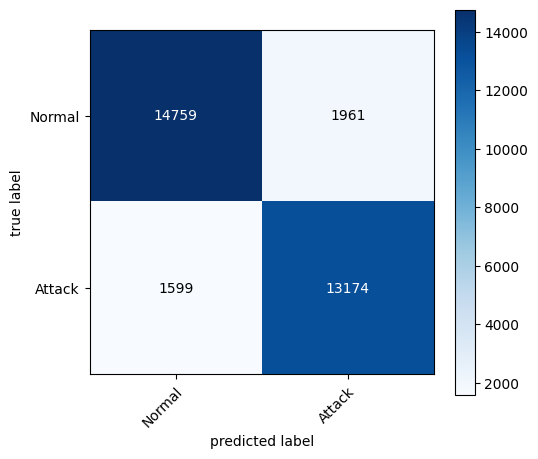

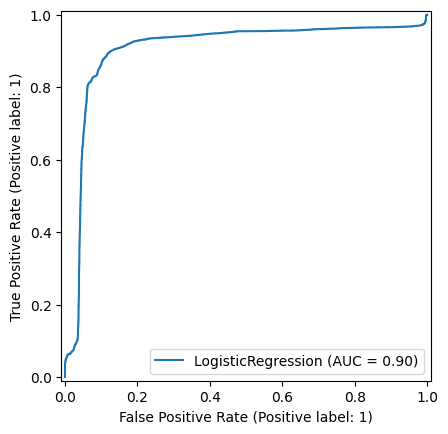

In [ ]:
Evaluate('Logistic Regression', LR, X_test_train, Y_test_train)




This will print the overall score that is the average of five individual model evaluation scores: 0.867, 0.923, 0.817, 0.867, and 0.923. The result can be calculated as a simple sum of these scores divided by 5. Then, the creation of the DT with the following parameters (`max_features=6` and `max_depth=4`) is performed, and the training on the data (`X_train_train`, `Y_train_train`) is carried out. After training, it evaluates the model performance against both the training and the test dataset by calculating the accuracy score on each. The `.score()` function returns the accuracy of the model on the train and test sets, which provide a measure of how well the Decision Tree has learned and generalized.

In [ ]:
print("Over All Score:",(0.867+0.923+0.817+0.867+0.923)/5.0)

Over All Score: 0.8794000000000001


In [ ]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train_train, Y_train_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [ ]:
DT.score(X_train_train, Y_train_train), DT.score(X_test_train, Y_test_train)

(0.9513966066533304, 0.9468770837963992)

Afterwards, the performance of the trained DT will be evaluated on the test dataset by calling the function `Evaluate` with `X_test_train` and `Y_test_train`. This function computes the performance based on different metrics, such as accuracy, sensitivity, precision, F1 score, recall, and prints the confusion matrix and draws a ROC curve in order to visualize the results. The `metrics.accuracy_score` computes the overall accuracy of the model, while `metrics.recall_score`, `metrics.precision_score`, and `metrics.f1_score` provide insights into the model's classification performance, especially in terms of handling false positives and false negatives. This comprehensive evaluation helps in understanding the model's ability to correctly classify the test data and its behavior with respect to both classes (Normal and Attack).

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.947

The Decision Tree Classifier Model Sensitvity = 0.904

The Decision Tree Classifier Model Precision  = 0.981

The Decision Tree Classifier Model F1 Score   = 0.941

The Decision Tree Classifier Model Recall     = 0.904

--------------------------------------------------



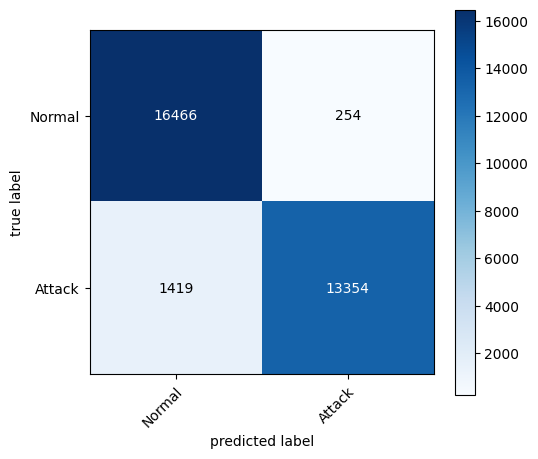

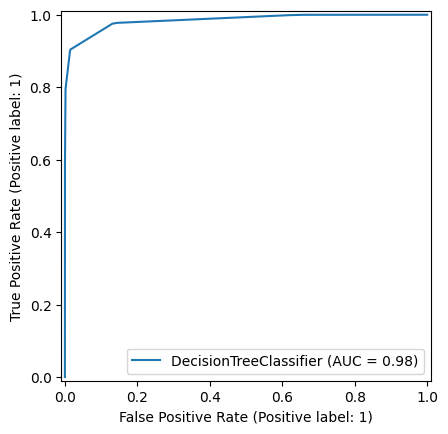

In [ ]:
Evaluate('Decision Tree Classifier', DT, X_test_train, Y_test_train)

The first line calculates the overall average score from five individual model evaluations, where the scores are represented as 0.909, 0.941, 0.874, 0.906, and 0.941. The average score is computed by adding these values together and dividing by 5. This gives an overall score for model performance across multiple evaluations. The second part of the code generates a graphical representation of the trained Decision Tree model (`DT`) using `tree.plot_tree()`. The tree is plotted in a filled color form where each node and its decisions are represented in a visual manner. This will help to understand exactly how the Decision Tree classifier makes decisions based on certain input features and provides insights into the model interpretability. Figure with size 15x12 inches to make it clear and readable.

In [ ]:
print("Over All Score:",( 0.909+0.941+0.874+0.906+0.941)/5.0)

Over All Score: 0.9142000000000001


[Text(0.5431034482758621, 0.9, 'x[21] <= 0.505\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.27586206896551724, 0.7, 'x[2] <= 0.005\ngini = 0.386\nsamples = 68080\nvalue = [50292, 17788]'),
 Text(0.40948275862068967, 0.8, 'True  '),
 Text(0.13793103448275862, 0.5, 'x[24] <= 0.98\ngini = 0.44\nsamples = 24613\nvalue = [8032.0, 16581.0]'),
 Text(0.06896551724137931, 0.3, 'x[32] <= 16.417\ngini = 0.494\nsamples = 13710\nvalue = [6112, 7598]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.449\nsamples = 8401\nvalue = [5543, 2858]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.191\nsamples = 5309\nvalue = [569, 4740]'),
 Text(0.20689655172413793, 0.3, 'x[30] <= -0.268\ngini = 0.29\nsamples = 10903\nvalue = [1920, 8983]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.013\nsamples = 9006\nvalue = [59, 8947]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.037\nsamples = 1897\nvalue = [1861, 36]'),
 Text(0.41379310344827586, 0.5, 'x[27] <= 0.005\ngini = 0.054\nsamples = 43467\nvalue = [

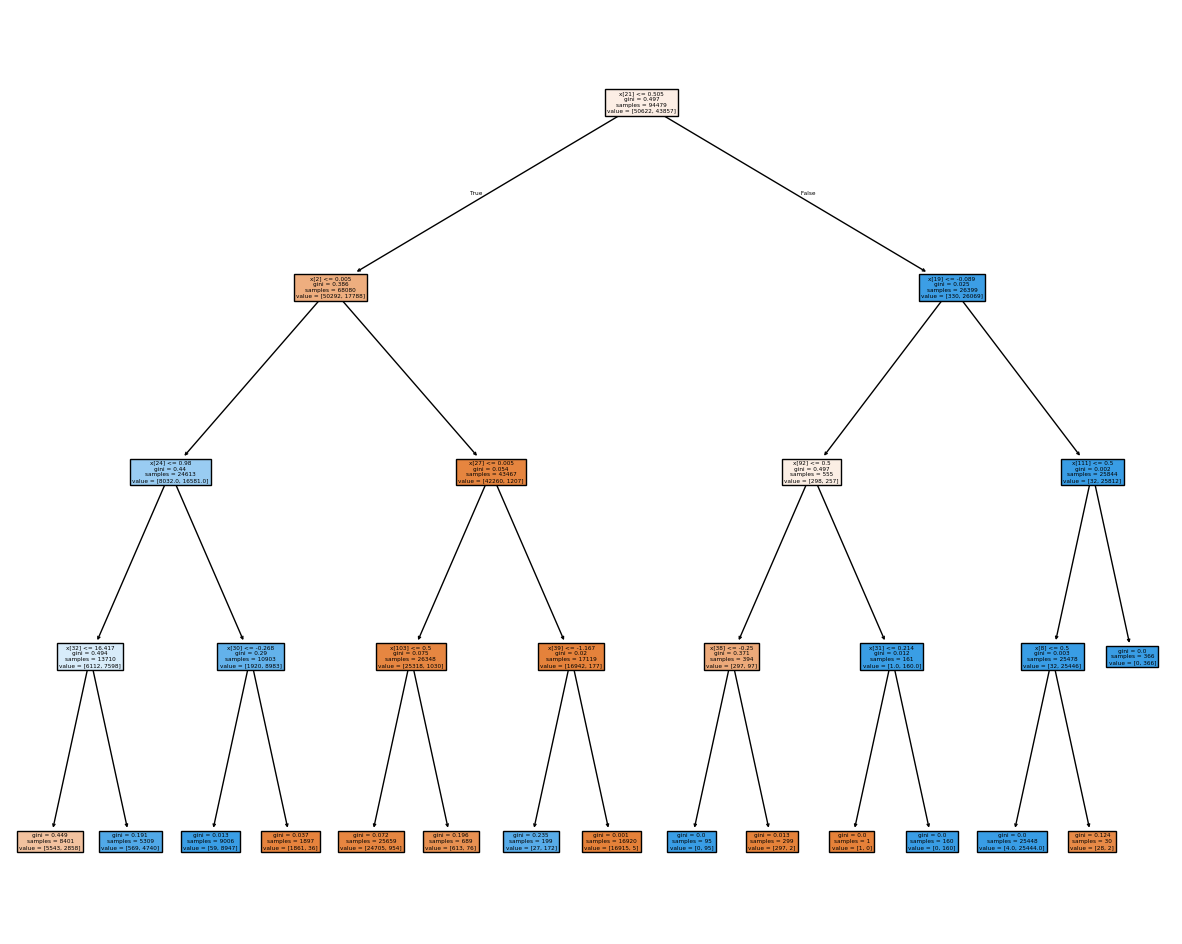

In [ ]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

During the execution, the hyperparameter for 'max_depth' has to be tuned for a RF ranging from 1-11. In the below line of code, `Parameter` dictionary defines a range for the 'max_depth' parameter which is provided as input for 'GridSearch' function along with 'RF model' and 'data'. This performs a grid search along with cross-validation on your data. After the best `max_depth` is found, it uses that to fit the model RandomForestClassifier on the training dataset via the `fit` method. The model performance is calculated with the `score` method to determine the model's accuracy on both the training and test data. In this way, it would be possible to decide the most effective hyperparameter for Random Forest and thus maximize its performance.

In [ ]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Parameters={ 'max_depth': max_depth}

In [ ]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train_train, Y_train_train)

RandomForestClassifier(max_depth=10)

In [ ]:
RF.fit(X_train_train, Y_train_train)

RandomForestClassifier()

In [ ]:
RF.score(X_train_train, Y_train_train), RF.score(X_test_train, Y_test_train)

(1.0, 1.0)

This will output the evaluation metrics, which include accuracy, sensitivity, precision, F1 score, recall, and the confusion matrix, plus the ROC curve of the Random Forest Classifier on the test data.

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



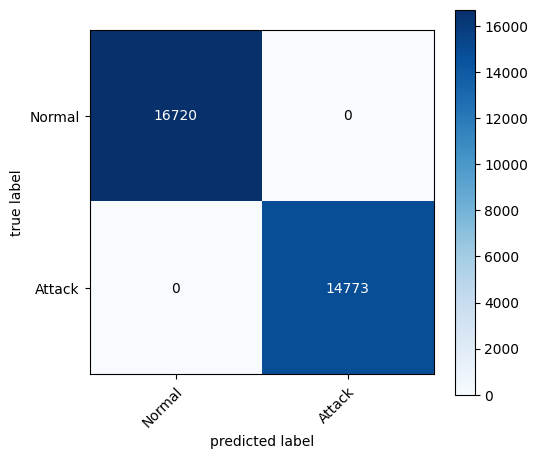

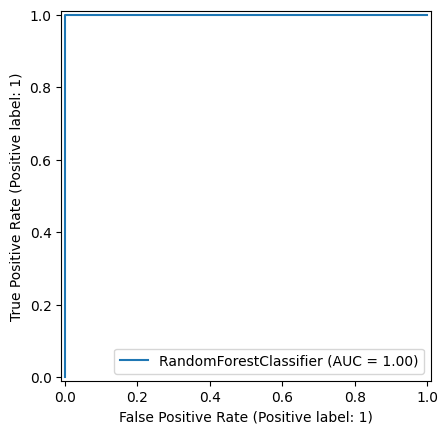

In [ ]:
Evaluate('Random Forest Classifier', RF, X_test_train, Y_test_train)

The K-Nearest Neighbors classifier is created with `n_neighbors=6` and trained on the training dataset. First, the model is evaluated on both the training and test sets by calculating its accuracy using the `.score()` method. The `Evaluate` function subsequently evaluates the performance of the KNN classifier on the test dataset, providing a broad set of metrics including-but not limited to-accuracy, sensitivity, precision, F1 score, recall, along with visualizations like the confusion matrix and ROC curve. This gives insight into the generalization of the model on unseen data, thus providing a comprehensive overview of the performance.

In [ ]:
KNN= KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train_train, Y_train_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
KNN.score(X_train_train, Y_train_train), KNN.score(X_test_train, Y_test_train)

(0.9957556705722965, 0.9949195059219509)

--------------------------------------------------

The KNN Model Accuracy   = 0.995

The KNN Model Sensitvity = 0.993

The KNN Model Precision  = 0.996

The KNN Model F1 Score   = 0.995

The KNN Model Recall     = 0.993

--------------------------------------------------



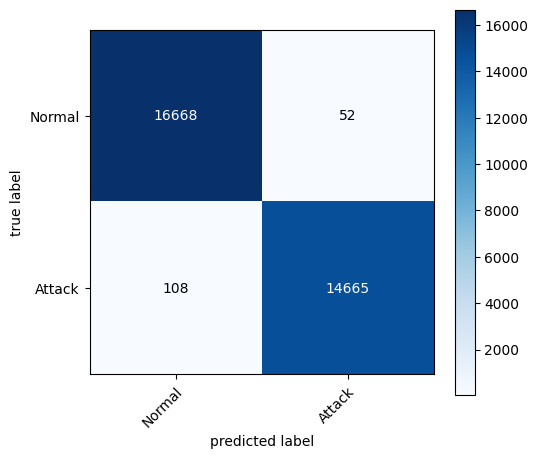

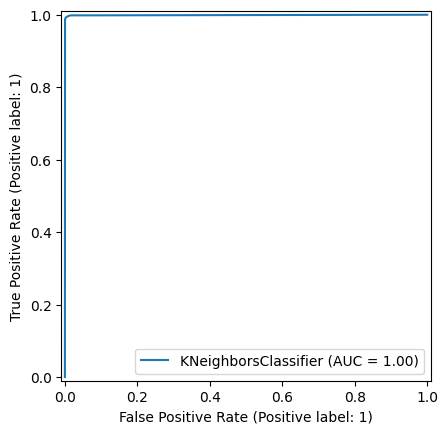

In [ ]:
Evaluate('KNN', KNN, X_test_train, Y_test_train)

This code will save the trained Random Forest model, RF, into a file called Random_Forest.pkl using Python's pickle module. It opens the file in write-binary mode ('wb') and serializes the RF model into the file. This way, you can load this model later without retraining it. This allows for the reuse and deployment of your models.

In [ ]:
import pickle

with open('Random_Forest.pkl','wb') as f:
    pickle.dump(RF,f)